# Machine Learning Project: Stroke Prediction

**Name:** Okba Kharef


## 1.Context

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. **id**: unique identifier

2. **gender**: "Male", "Female" or "Other"

3. **age**: age of the patient

4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. **Residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: average glucose level in blood

10. **bmi**: body mass index

11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 


## 2. Project Objective

The goal of this project is to analyze a dataset of patient attributes to predict the likelihood of a stroke. We will perform a comprehensive analysis which includes:

1.  **Exploratory Data Analysis (EDA):** To understand the data's structure, features, and identify potential challenges .
2.  **Data Preprocessing:** To clean and prepare the data for machine learning models.
3.  **Model Training:** To build and train several classification algorithms, including both basic models and more complex ensemble methods.
4.  **Model Evaluation & Comparison:** To evaluate the models using appropriate metrics for an imbalanced dataset and to compare their performance to identify the most effective algorithm.

## 2. Setup: Importing Libraries

This first code block is for importing all the necessary Python libraries for the project.

In [173]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as msno
from pywaffle import Waffle



# For splitting data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Optional: for scaling numerical features
from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from scipy.stats import wilcoxon


import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# For evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score,mean_squared_error, mean_absolute_error, make_scorer, precision_score, recall_score, ConfusionMatrixDisplay




# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Loading the Data

Here, we load the dataset from the CSV file into a pandas DataFrame.

In [175]:
# Load the dataset
#dataset URL= https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')


## 4. Exploratory Data Analysis (EDA)

In this section, we explore the data to understand its properties and find any issues that need to be addressed.

### 4.1. Initial Data Inspection

Let's look at the first few rows, the data types, and a statistical summary.

In [176]:
# Display the first 5 rows of the dataframe
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [177]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 11 features and 1 output variable


In [178]:
# Get a concise summary of the dataframe, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- In our dataset, we have both numerical and categorical variables.
- It is essential to see whether columns are correctly inferred.
- The most important one to look for is our target variable 'stroke'
- 'Stroke' is detected as an integer, not as an object.
- Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
- Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object. 
- Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease) 
- And 0 for the negative cases (does not have hypertension/heart disease)
- We don't need to change them, but it is good to see and be aware of it.
- In addition to them, we have 3 categorical variables, which we have to encode as numerical.

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have?</b></font>
- We have binary classification problem.
- We make prection on the target variable **STROKE**
- And we will build a model to get best prediction on the stroke variable.

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>


- One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [179]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


- Almost %95 of the instances of our target variable is 'No stroke'
-  4861 patient does not have a stroke
- %5  of the instances of our target variable is 'Stroke'
- 249 patient have a stroke.

- We have imbalanced data.


In [180]:
stroke_counts = df['stroke'].value_counts().reset_index()
stroke_counts.columns = ['stroke', 'count']
stroke_counts['stroke'] = stroke_counts['stroke'].astype(str) # For discrete colors

fig = px.bar(stroke_counts, x="stroke", y="count", title='Distribution of Target Variable: Stroke',
             width=500, height=400, # Slightly wider for better title display
             color='stroke', # Use the 'stroke' column for color mapping
             color_discrete_map={'0': COLOR_NO_STROKE, '1': COLOR_STROKE},
             labels={'stroke': 'Stroke Occurrence', 'count': 'Number of Patients'})
fig.update_layout(title_font_size=TITLE_FONT_ARGS['fontsize']-4, # Adjust as Plotly has different scaling
                  font=dict(family=FONT_FAMILY_SERIF))
fig.show()

- Our  stroke dataset is an example of a so-called imbalanced dataset.
- There are 19 times more people who didn’t have stroke in our data than who had, and we say that the non-stroke class dominates the stroke class.
- We can clearly see that: the stroke rate in our data is 0.048
- Which is a strong indicator of class imbalance

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Imbalance Data</b></font>

- Instances across classes are imbalanced, like in our dataset, we have imbalance data.

- The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

- Some of the metrics (like accuracy) give us misleading results.

- Most of the time in classification problems our interest is to get better predict on the minority class.

- In our example: People had a stroke is minority class.

- Otherwise our machine learning algorithm falsely predicts majority class.

- In our example: No stroke is majority class.

There are a few different ways to handle imbalanced datasets,
such as *undersampling* the majority class, or *oversampling* the minority one.
We could also use more advanced algorithms, such as *SMOTE*, to generate synthetic samples from the minority class.

<a id="6"></a>
<font color="lightseagreen" size=+1.5><b>Decide the Metric</b></font>

- This is the first step when approaching a machine learning problem: decide the metric!

- My reasoning is that minimizing false negatives, and therefore maximizing sensitivity/recall, is the priority in this context, as classifying someone as without STROKE when they have it would cause delayed or missed critical treatment, leading to significantly worse patient outcomes, permanent disability, or even death. False positives are undesirable, as people would take unnecessary precautions, but not as important as minimizing false negatives.

- The choice of the wrong metric can mean choosing the wrong algorithm.

- Rather than the basic *accuracy* metric, we will use *balanced accuracy*, which is suited for imbalanced data.
*Balanced accuracy* is defined as the arithmetic mean of *accuracy* and *recall*:

$$
\text{Balanced Accuracy} = \frac{sensitivity + specificity}{2}
$$

Where *sensitivity* is the proportion of actual positives that are correctly identified as such,
*specificity* is the proportion of actual negatives that are correctly identified,
and *precision* quantifies the number of correct positive predictions made out of positive predictions made by the model.

$$
\text{Sensitivity} = \frac{TP}{TP + FN}
\hspace{6 mm}
\text{Specificity} = \frac{TN}{TN + FP}
\hspace{6 mm}

$$

In [181]:
# Get descriptive statistics for numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [182]:
# This helps check for any rare categories.

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
------------------------------
Value counts for column: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------------------
Value counts for column: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
------------------------------
Value counts for column: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
------------------------------
Value counts for column: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
------------------------------


### 4.2. Handling Missing Values

-In our initial data inspection with **.info()**, we identified that the bmi column is the only one with missing values. Before we can train our models, we must address these missing entries through imputation, which means filling in the blanks with a substituted value.

In [183]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [184]:
missing_bmi_count = df['bmi'].isnull().sum()
total_rows = len(df)
missing_percentage = (missing_bmi_count / total_rows) * 100

print(f"Number of missing BMI values: {missing_bmi_count}")
print(f"Percentage of missing BMI values: {missing_percentage:.2f}%")

Number of missing BMI values: 201
Percentage of missing BMI values: 3.93%


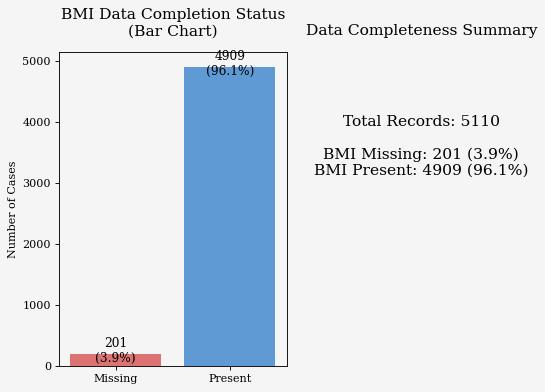

Detailed Summary:
Total records: 5110
Missing BMI: 201 (3.9%)
Available BMI: 4909 (96.1%)


In [185]:
# Visualize missing values in the dataset
# Calculate missing values
total = len(df)
missing = df['bmi'].isna().sum()
present = total - missing
missing_pct = round(missing/total * 100, 1)

# Create visualization
plt.figure(figsize=(7, 5))

# Bar plot
plt.subplot(121)
ax = sns.barplot(x=['Missing', 'Present'], 
                 y=[missing, present], 
                palette=[COLOR_MISSING, COLOR_PRESENT])
plt.title('BMI Data Completion Status\n(Bar Chart)', fontsize=14)
plt.ylabel('Number of Cases')

# Add annotations
for i, v in enumerate([missing, present]):
    pct = f'{missing_pct}%' if i == 0 else f'{100-missing_pct}%'
    ax.text(i, v + 50, f'{v}\n({pct})', 
            ha='center', 
            va='center',
            fontsize=11)

# Text-based visualization
plt.subplot(122)
plt.text(0.5, 0.7, 
         f"Total Records: {total}\n\nBMI Missing: {missing} ({missing_pct}%)\nBMI Present: {present} ({100-missing_pct}%)",
         fontsize=14,
         ha='center',
         va='center')
plt.axis('off')
plt.title('Data Completeness Summary', fontsize=14)

plt.tight_layout()
plt.show()

# Print detailed summary
print(f"Detailed Summary:")
print(f"Total records: {total}")
print(f"Missing BMI: {missing} ({missing_pct}%)")
print(f"Available BMI: {present} ({100-missing_pct}%)")

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.1.Choosing the Right Imputation Strategy: Mean vs. Median</b></font>

With approximately **4% of BMI** values missing, simply deleting these rows would cause a loss of valuable data. A better approach is to impute them. The two most common strategies are using the mean or the median value of the column.
- **Mean**: The average value. It is simple but **can be easily influenced by extremely high or low values (outliers)**.
- **Median**: The middle value of the sorted data. It is known to be **robust to outliers**.

To make an informed decision, we must visualize the distribution of the bmi column. This will show us if the data is symmetric or if it is "skewed" by the presence of outliers.

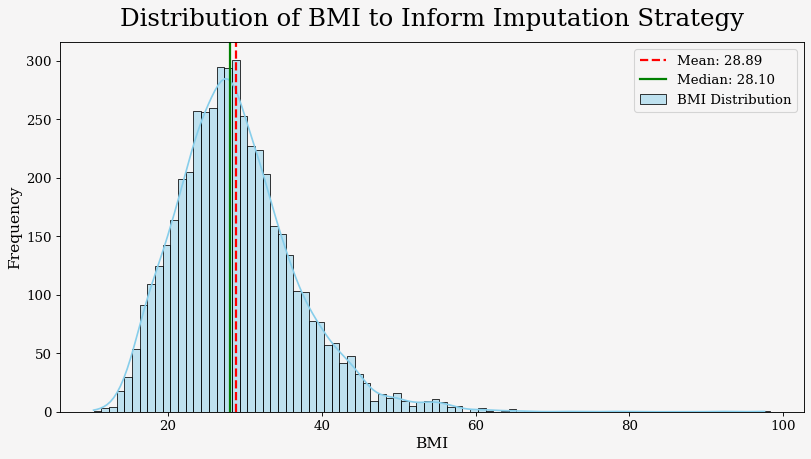

In [186]:
# Original: color='skyblue', mean color='red', median color='green'
# Suggested:
plt.figure(figsize=(12, 6)) # Consistent size
# plt.title('Distribution of BMI (with Mean and Median)', fontsize=TITLE_FONT_ARGS['fontsize']) # Using global rcParams
# plt.xlabel('BMI', fontsize=AXIS_LABEL_FONT_ARGS['fontsize'])
# plt.ylabel('Frequency', fontsize=AXIS_LABEL_FONT_ARGS['fontsize'])

sns.histplot(df['bmi'].dropna(), kde=True, color=COLOR_SECONDARY_DISTRIBUTION, binwidth=1, label='BMI Distribution')
plt.axvline(df['bmi'].mean(), color=COLOR_MEAN, linestyle='--', linewidth=2, label=f"Mean: {df['bmi'].mean():.2f}")
plt.axvline(df['bmi'].median(), color=COLOR_MEDIAN, linestyle='-', linewidth=2, label=f"Median: {df['bmi'].median():.2f}")
plt.legend(fontsize=LEGEND_FONT_ARGS['fontsize'])
plt.title('Distribution of BMI to Inform Imputation Strategy', fontdict={'fontsize': TITLE_FONT_ARGS['fontsize']-2}) # Use args if not fully relying on rcParams
plt.xlabel('BMI', fontdict={'fontsize': AXIS_LABEL_FONT_ARGS['fontsize']-2})
plt.ylabel('Frequency', fontdict={'fontsize': AXIS_LABEL_FONT_ARGS['fontsize']-2})
plt.xticks(fontsize=TICK_LABEL_FONT_ARGS['fontsize'])
plt.yticks(fontsize=TICK_LABEL_FONT_ARGS['fontsize'])
plt.show()

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.2. Analysis of the Distribution and Final Decision</b></font>

The visualization provides critical insights for our decision:

1. **Right-Skewed Distribution**: The graph is not symmetrical. There is a "tail" extending to the right, which indicates the presence of a minority of patients with very high BMI values **(outliers).**
2. **Mean vs. Median Position**: While the two values are numerically close (Mean: 28.89, Median: 28.10), their positions are telling. The Mean (red line) is positioned slightly to the right of the Median (green line).

**Conclusion**: This slight difference is visual proof that the outliers in the tail are pulling the Mean towards them. Even though the effect is small, it confirms the Mean is being influenced by extreme values. The Median, located at the center of the main population hump, is unaffected. For this reason, **the Median is the more statistically robust and honest representation of a 'typical' patient.** Therefore, it is the best choice for imputation.

We will now fill the missing BMI values using the calculated median.

In [187]:
# Calculate the median value of the 'bmi' column
bmi_median = df['bmi'].median()
print(f"The calculated median BMI to be used for imputation is: {bmi_median:.2f}")

# Impute the missing values in 'bmi' with the median.
# The inplace=True argument modifies the DataFrame directly, so we don't need to re-assign it.
df['bmi'].fillna(bmi_median, inplace=True)

The calculated median BMI to be used for imputation is: 28.10


<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.3.Verification</b></font>

In [188]:
# Check the number of missing values in the 'bmi' column one last time
final_missing_count = df['bmi'].isnull().sum()

print(f"Number of missing BMI values after imputation: {final_missing_count}")

if final_missing_count == 0:
    print("Verification successful: The 'bmi' column has no missing values.")
else:
    print("Warning: Missing values still exist in the 'bmi' column.")

Number of missing BMI values after imputation: 0
Verification successful: The 'bmi' column has no missing values.


### 4.3. Data Visualization

Next, we want to explore the data.

fundamentally we need to understand the relationships within the data.
- Which features seem to be important for predicting a stroke?
- What do the characteristics of patients who have strokes look like?
- Does age makes one more likely to suffer a stroke? What about gender? Or BMI?

These are all questions that can be explored and answered with some data visulization.

First, let's look at the numeric/continuous variable distribtion

#### Numerical and Categorical Features

##### <a id="3"></a><font color="lightseagreen" size=+1.5><b>Features Identification</b></font>

In [190]:
# Create lists to hold the names of columns of different data types
numerical_features = []
categorical_features = []

# Loop through all the columns in the DataFrame
for col in df.columns:
    # Check if the column is of a numeric data type and has more than 2 unique values
    # (We consider columns with only 2 unique values, like 'hypertension', as categorical)
    if pd.api.types.is_numeric_dtype(df[col]) :  #and df[col].nunique() > 2
        numerical_features.append(col)
    # All other columns are treated as categorical
    else:
        categorical_features.append(col)

# Print the lists to see the results
print("--- Column Types ---")
print("\nNumerical Features:")
for feature in numerical_features:
    print(f"  - {feature}")
print("\nCategorical Features:")
for feature in categorical_features:
    print(f"  - {feature}")

--- Column Types ---

Numerical Features:
  - id
  - age
  - hypertension
  - heart_disease
  - avg_glucose_level
  - bmi
  - stroke

Categorical Features:
  - gender
  - ever_married
  - work_type
  - Residence_type
  - smoking_status


For feature extraction, binning was applied for all the continous values, binning values are taken from follow articles.


* [body mass index binning](https://www.medicalnewstoday.com/articles/323446#body-mass-index)
* [Age binning](https://kidspicturedictionary.com/english-through-pictures/people-english-through-pictures/age-physical-description/)
* [average glucose binning](https://agamatrix.com/blog/normal-blood-sugar-level-chart/)

In [191]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

##### <a id="3"></a><font color="lightseagreen" size=+1.5><b>analysis of continuous features</b></font>

###### <a id="3"></a><font color="lightseagreen" size=+0.9><b>Correlation matrix</b></font>

So we've gained some understanding on the distributiona of our numeric variables, but we can add more information to this plot.

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

This could be important for modelling later on

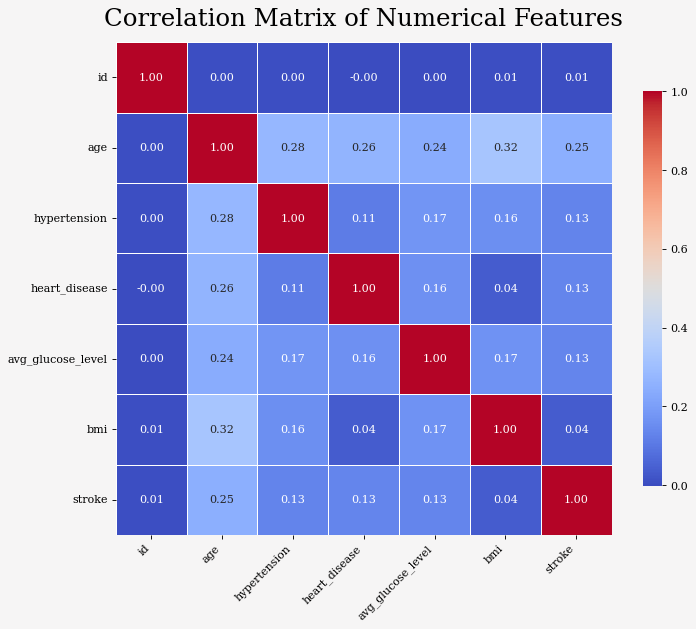

In [192]:
# Correlation matrix (numeric columns only)
corr = df.select_dtypes(include=[np.number]).corr()
# Original: cmap='Spectral'
# Suggested:
plt.figure(figsize=(10, 8)) # Slightly adjusted for readability
sns.heatmap(data=corr, annot=True, cmap=CORRELATION_CMAP, fmt=".2f", # Add fmt for consistent decimal places
            linewidths=.5, cbar_kws={"shrink": .8}) # Optional: visual tweaks
plt.title("Correlation Matrix of Numerical Features", fontdict={'fontsize': TITLE_FONT_ARGS['fontsize']-2})
plt.xticks(fontsize=TICK_LABEL_FONT_ARGS['fontsize']-2, rotation=45, ha="right")
plt.yticks(fontsize=TICK_LABEL_FONT_ARGS['fontsize']-2)
plt.show()

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

###### <a id="3"></a><font color="lightseagreen" size=+0.9><b>Story of an Aged Heart - Heart Strokes and Age</b></font>

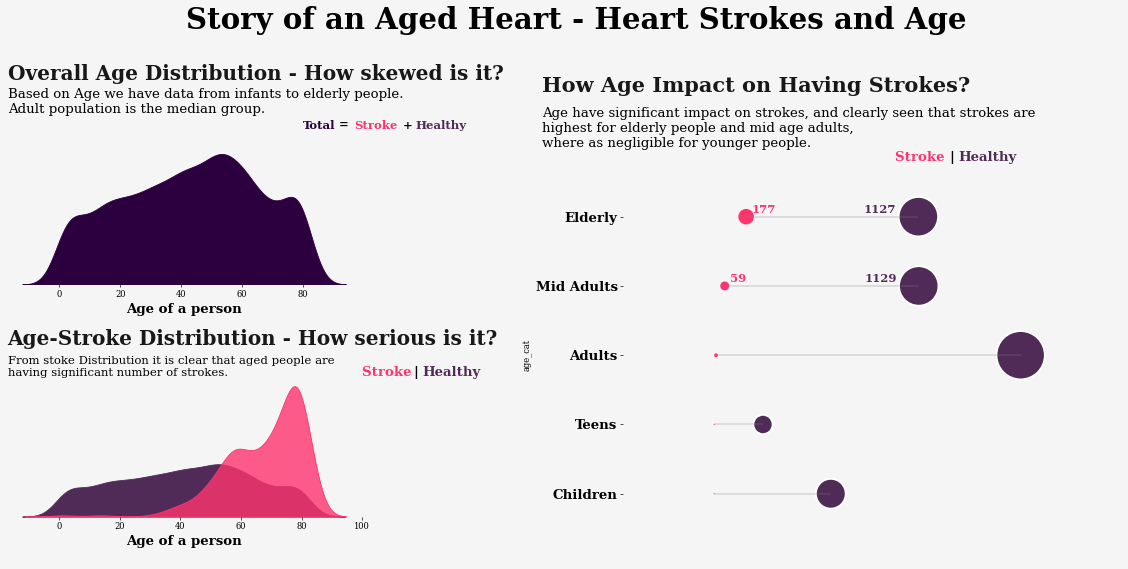

In [194]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[1:10,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(COLOR_BACKGROUND_FIG)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(COLOR_BACKGROUND_FIG)
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_age = df[df['stroke'] == 1].age_cat.value_counts()
healthy_age = df[df['stroke'] == 0].age_cat.value_counts()

ax1.hlines(y = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'], xmin = [644,270,1691,1129,1127], 
          xmax = [1,1,11,59,177], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_age.index, x = stroke_age.values, s = stroke_age.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_age.index, x = healthy_age.values, s = healthy_age.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 2250)
ax1.set_ylim(ymin = -1,ymax = 5)

ax1.set_yticklabels( labels = ['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-950,5.8, 'How Age Impact on Having Strokes?' ,{'font': 'Serif', 'fontsize': 25,'weight':'bold', 'color':'black'},alpha = 0.9)
ax1.text(1000,4.8, 'Stroke ', {'font': 'Serif','weight':'bold','fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1300,4.8, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(1350,4.8, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-950,5., 'Age have significant impact on strokes, and clearly seen that strokes are \nhighest for elderly people and mid age adults, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})

ax1.text(stroke_age.values[0] + 30,4.05, stroke_age.values[0], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[2] - 300,4.05, healthy_age.values[2], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_age.values[1] + 30,3.05, stroke_age.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_age.values[1] - 300,3.05, healthy_age.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)
ax2.text(-17,0.021, 'Based on Age we have data from infants to elderly people.\nAdult population is the median group.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(-17,0.043,'From stoke Distribution it is clear that aged people are \nhaving significant number of strokes.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(117,0.043, '|', {'color':'black' , 'fontsize':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,1,'Story of an Aged Heart - Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()


###### <a id="3"></a><font color="lightseagreen" size=+0.9><b>Story of a Sweet Heart - Heart Strokes and Glucose</b></font>

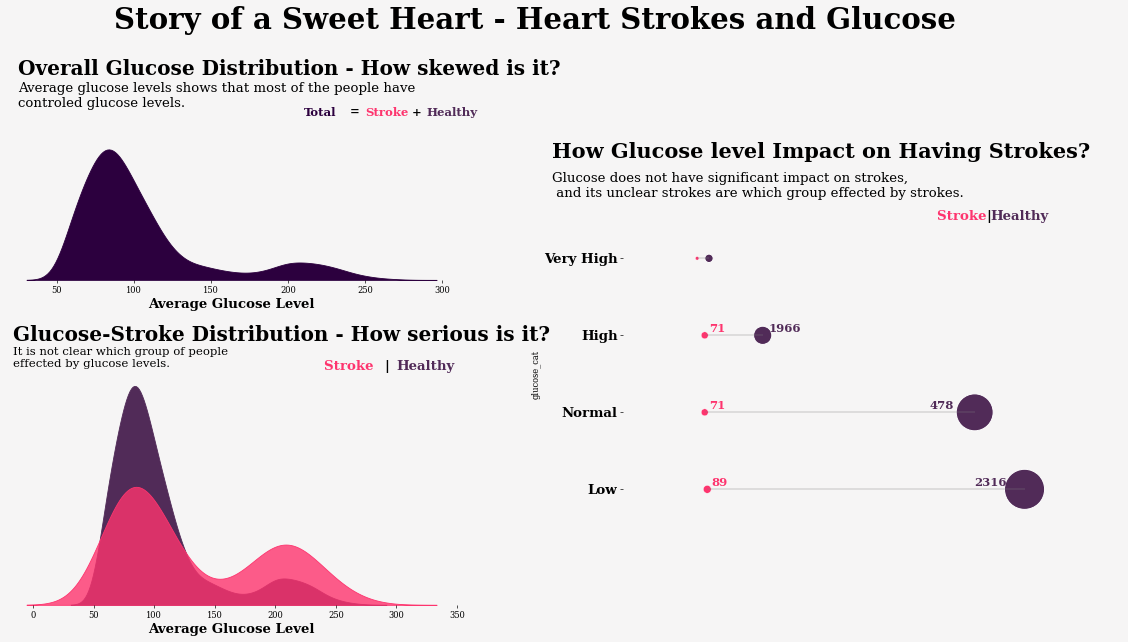

In [195]:
# sugar distribution plots


fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:10]) #distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot
ax1 = fig.add_subplot(gs[0:,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(COLOR_BACKGROUND_FIG)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(COLOR_BACKGROUND_FIG)
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# dumbbell plot of stoke and healthy people

stroke_glu = df[df['stroke'] == 1].glucose_cat.value_counts()
healthy_glu = df[df['stroke'] == 0].glucose_cat.value_counts()

ax1.hlines(y = ['Low', 'Normal', 'High', 'Very High'], xmin = [2316,1966,478,101], 
          xmax = [89,71,71,18], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_glu.index, x = stroke_glu.values, s = stroke_glu.values, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_glu.index, x = healthy_glu.values, s = healthy_glu.values, color = '#512b58', ax= ax1, alpha = 1)

ax1.axes.get_xaxis().set_visible(False)
ax1.set_xlim(xmin = -500, xmax = 3000)
ax1.set_ylim(ymin = -1.5,ymax = 4.5)

ax1.set_yticklabels( labels = ['Low', 'Normal', 'High', 'Very High'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-1000,4.3, 'How Glucose level Impact on Having Strokes?' ,{'font': 'Serif', 'fontsize': 25,'weight':'bold', 'color':'black'})
ax1.text(1700,3.5, 'Stroke ', {'font': 'Serif','weight':'bold', 'fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(2050,3.5, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax1.text(2075,3.5, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-1000,3.8, 'Glucose does not have significant impact on strokes,\n and its unclear strokes are which group effected by strokes.',
        {'font':'Serif', 'fontsize':'16','color': 'black'})

ax1.text(stroke_glu.values[0] + 30,0.05, stroke_glu.values[0], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[0] + -355,0.05, healthy_glu.values[0], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glu.values[2] + 30,1.05, stroke_glu.values[2], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[2] + 1170,1.05, healthy_glu.values[2], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_glu.values[1] + 30,2.05, stroke_glu.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_glu.values[1] - 1450,2.05, healthy_glu.values[1], {'font':'Serif', 'fontsize':14, 'weight':'bold', 'color':'#512b58'})



# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(25,0.025,'Overall Glucose Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(25,0.021, 'Average glucose levels shows that most of the people have \ncontroled glucose levels.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(210,0.020, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(240,0.02, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.02, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(280,0.02, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(290,0.02, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Glucose-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-17,0.0176,'It is not clear which group of people \neffected by glucose levels.', {'font':'Serif', 'color': 'black', 'size':14})
ax3.text(240,0.0174, 'Stroke ', {'font': 'Serif','weight':'bold', 'fontsize': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174, 'Healthy', {'font': 'Serif','weight':'bold', 'fontsize': 16,'style':'normal', 'weight':'bold','color':'#512b58'})


fig.text(0.2,1.07,'Story of a Sweet Heart - Heart Strokes and Glucose',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()


###### <a id="3"></a><font color="lightseagreen" size=+0.9><b>Story of a Heavy Heart - Heart Strokes and Weight</b></font>

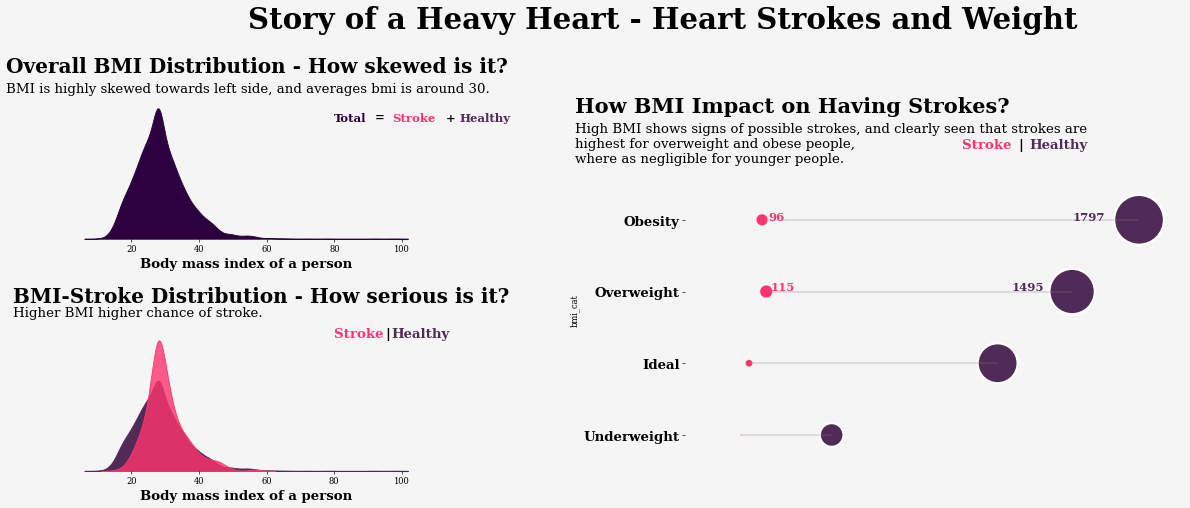

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (24,10),dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
ax1 = fig.add_subplot(gs[2:9,13:]) #dumbbell plot

# axes list
axes = [ ax1,ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(COLOR_BACKGROUND_FIG)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(COLOR_BACKGROUND_FIG)
        
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)
ax1.set_xlim(xmin = -250,xmax = 2000)
ax1.set_ylim(ymin = -1,ymax =3.5)

# dumbbell plot of stoke and healthy people

stroke_bmi = df[df['stroke'] == 1].bmi_cat.value_counts()
healthy_bmi = df[df['stroke'] == 0].bmi_cat.value_counts()

ax1.hlines(y = ['Obesity', 'Overweight', 'Ideal', 'Underweight'], xmin = [96,115,37,1], 
          xmax = [1797,1495,1159,410], color = 'grey',**{'linewidth':0.5})


sns.scatterplot(y = stroke_bmi.index, x = stroke_bmi.values, s = stroke_bmi.values*2, color = '#fe346e', ax= ax1, alpha = 1)
sns.scatterplot(y = healthy_bmi.index, x = healthy_bmi.values, s = healthy_bmi.values*2, color = '#512b58', ax= ax1, alpha = 1)

ax1.set_yticklabels( labels = ['Obesity', 'Overweight', 'Ideal', 'Underweight'],fontdict = {'font':'Serif', 'fontsize':16,'fontweight':'bold', 'color':'black'})

ax1.text(-750,-1.5, 'How BMI Impact on Having Strokes?' ,{'font': 'Serif', 'size': 25,'weight':'bold', 'color':'black'})
ax1.text(1000,-1., 'Stroke ', {'font': 'Serif','weight':'bold','size': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax1.text(1250,-1, '|', {'color':'black' , 'size':16, 'weight': 'bold'})
ax1.text(1300,-1, 'Healthy', {'font': 'Serif','weight':'bold', 'size': 16,'style':'normal', 'weight':'bold','color':'#512b58'})
ax1.text(-750,-0.8, 'High BMI shows signs of possible strokes, and clearly seen that strokes are \nhighest for overweight and obese people, \nwhere as negligible for younger people.', 
        {'font':'Serif', 'size':'16','color': 'black'})



ax1.text(stroke_bmi.values[0] + 20 , 0.98, stroke_bmi.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_bmi.values[1] - 275 ,0.98, healthy_bmi.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})

ax1.text(stroke_bmi.values[1] + 30,0, stroke_bmi.values[1], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#fe346e'})
ax1.text(healthy_bmi.values[0] - 300,0, healthy_bmi.values[0], {'font':'Serif', 'size':14, 'weight':'bold', 'color':'#512b58'})




# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.085,'Overall BMI Distribution - How skewed is it?', {'font':'Serif', 'color': 'black','weight':'bold','size':24})
ax2.text(-17,0.075, 'BMI is highly skewed towards left side, and averages bmi is around 30.', 
        {'font':'Serif', 'size':'16','color': 'black'})
ax2.text(80,0.06, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.06, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.12,'BMI-Stroke Distribution - How serious is it?', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})
ax3.text(-15,0.11,'Higher BMI higher chance of stroke.', {'font':'Serif', 'color': 'black', 'size':16})
ax3.text(80,0.095, 'Stroke ', {'font': 'Serif','weight':'bold','size': 16,'weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(95,0.095, '|', {'color':'black' , 'size':16, 'weight': 'bold'})
ax3.text(97,0.095, 'Healthy', {'font': 'Serif','weight':'bold', 'size': 16,'style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.25,0.925,'Story of a Heavy Heart - Heart Strokes and Weight',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

##### <a id="3"></a><font color="lightseagreen" size=+1.5><b>Overview of categorical features </b></font>

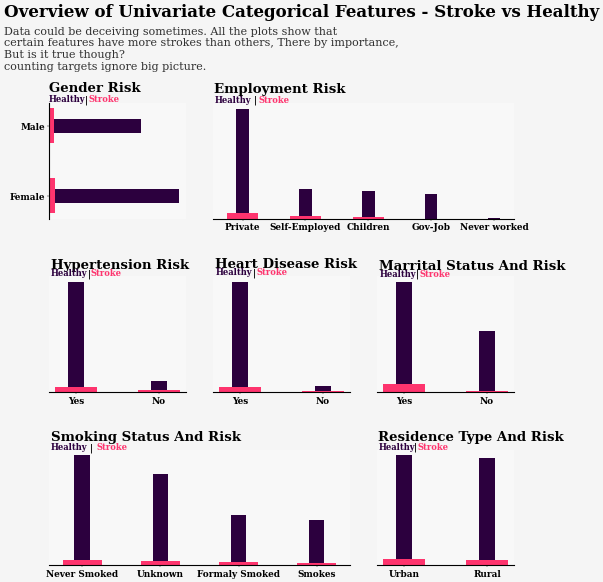

In [197]:
fig = plt.figure(figsize = (15,15),dpi = 40)

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.2, hspace = 0.5)


ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1:])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0:2])
ax7 = fig.add_subplot(gs[2,2])

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')
    ax.spines['bottom'].set_linewidth(2)
    for loc in ['left', 'right', 'top']:
        ax.spines[loc].set_visible(False)
        ax.spines[loc].set_linewidth(2)


title_args = {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}
font_dict = {'size':16, 'family':'Serif', 'color':'black', 'weight':'bold'}
health_dict = {'font':'Serif', 'color': '#2c003e', 'size':15, 'weight':'bold'}
dash_dict = {'font':'Serif', 'color': 'black', 'size':15,'weight':'bold'}
stroke_dict = {'font':'Serif', 'color': '#fe346e', 'size':15,'weight':'bold'}

stroke_col = '#fe346e'
healthy_col = '#2c003e'

# Ax1: Gender- stroke distributions
healthy_gen = df[df['stroke'] == 0].gender.value_counts()
stroke_gen = df[df['stroke'] == 1].gender.value_counts()

ax1.barh( stroke_gen.index , width = healthy_gen.values[0:2], height = 0.2, color = healthy_col)
ax1.barh( np.arange(len(stroke_gen.index)) , width = stroke_gen.values, height = 0.5, color = stroke_col)
ax1.set_yticklabels(stroke_gen.index, **font_dict)

ax1.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(True)
ax1.text(0,1.5, 'Gender Risk',**title_args)
ax1.text(0,1.35, 'Healthy',**health_dict)
ax1.text(790,1.35, '|',**dash_dict)
ax1.text(870,1.35, 'Stroke',**stroke_dict)

# Ax2: work type - stroke distributions
healthy_gen = df[df['stroke'] == 0].work_type.value_counts()
stroke_gen = df[df['stroke'] == 1].work_type.value_counts()

ax2.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2, color = healthy_col)
ax2.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5, color= stroke_col)
ax2.set_xticklabels(['Private','Self-Employed','Children', 'Gov-Job','Never worked'], **font_dict)


ax2.text(-0.45,3200, 'Employment Risk',**title_args)
ax2.text(-0.45,2950, 'Healthy',**health_dict)
ax2.text(0.18,2950, '|',**dash_dict)
ax2.text(0.25,2950, 'Stroke',**stroke_dict)

# Ax3: hypertension - stroke distributions

healthy_gen = df[df['stroke'] == 0].hypertension.value_counts()
stroke_gen = df[df['stroke'] == 1].hypertension.value_counts()

ax3.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax3.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax3.set_xticklabels(['Yes','No'], **font_dict)

ax3.text(-0.3,5000, 'Hypertension Risk',**title_args)
ax3.text(-0.3,4700, 'Healthy',**health_dict)
ax3.text(0.14,4700, '|',**dash_dict)
ax3.text(0.18,4700, 'Stroke',**stroke_dict)


# Ax4: Heart Disease - stroke distributions

healthy_gen = df[df['stroke'] == 0].heart_disease.value_counts()
stroke_gen = df[df['stroke'] == 1].heart_disease.value_counts()

ax4.bar(['Yes','No'] , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax4.bar( stroke_gen.index, height = stroke_gen.values, width = 0.5,color= stroke_col)
ax4.set_xticklabels(['Yes', 'No'],**font_dict)

ax4.text(-0.3,5250, 'Heart Disease Risk',**title_args)
ax4.text(-0.3,4950, 'Healthy',**health_dict)
ax4.text(0.15,4950, '|',**dash_dict)
ax4.text(0.20,4950, 'Stroke',**stroke_dict)


# Ax5: Married - stroke distributions
healthy_gen = df[df['stroke'] == 0].ever_married.value_counts()
stroke_gen = df[df['stroke'] == 1].ever_married.value_counts()

ax5.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax5.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col )
ax5.set_xticklabels(healthy_gen.index, **font_dict)

ax5.text(-0.3,3500, 'Marrital Status And Risk',**title_args)
ax5.text(-0.3,3300, 'Healthy',**health_dict)
ax5.text(0.14,3300, '|',**dash_dict)
ax5.text(0.18,3300, 'Stroke',**stroke_dict)




# Ax6: Smoking status - stroke distributions

healthy_gen = df[df['stroke'] == 0].smoking_status.value_counts()
stroke_gen = df[df['stroke'] == 1].smoking_status.value_counts()

ax6.bar( healthy_gen.index, height = healthy_gen.values, width = 0.2,color = healthy_col)
ax6.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax6.set_xticklabels(['Never Smoked', 'Unknown','Formaly Smoked' ,'Smokes'], **font_dict)

ax6.text(-0.4,2050, 'Smoking Status And Risk',**title_args)
ax6.text(-0.4,1900, 'Healthy',**health_dict)
ax6.text(0.095,1900, '|',**dash_dict)
ax6.text(0.18,1900, 'Stroke',**stroke_dict)




# Ax7: Residence type - stroke distributions

healthy_gen = df[df['stroke'] == 0].Residence_type.value_counts()
stroke_gen = df[df['stroke'] == 1].Residence_type.value_counts()

ax7.bar( healthy_gen.index , height = healthy_gen.values, width = 0.2,color = healthy_col)
ax7.bar( np.arange(len(stroke_gen.index)) , height = stroke_gen.values, width = 0.5,color= stroke_col)
ax7.set_xticklabels(healthy_gen.index, **font_dict)

ax7.text(-0.31,2800, 'Residence Type And Risk',**title_args)
ax7.text(-0.31,2600, 'Healthy',**health_dict)
ax7.text(0.12,2600,'|',**dash_dict)
ax7.text(0.165,2600, 'Stroke',**stroke_dict)

fig.text(0.05,1.025, 'Overview of Univariate Categorical Features - Stroke vs Healthy', {'font':'Serif', 'color':'black','size':30, 'weight':'bold'})
fig.text(0.05,0.9375,'Data could be deceiving sometimes. All the plots show that\ncertain features have more strokes than others, There by importance, \nBut is it true though? \ncounting targets ignore big picture.',{'font':'Serif', 'color':'black','size':20, 'weight':'normal'}, alpha = 0.8)

fig.show()

#### Target Variable: `stroke`

This plot will show us the distribution of our target variable and reveal if we have a class imbalance problem.

Percentage of each class in the 'stroke' column:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

Observation: The dataset is highly imbalanced, with strokes accounting for less than 5% of all cases.
This justifies our later use of SMOTE to balance the training data.


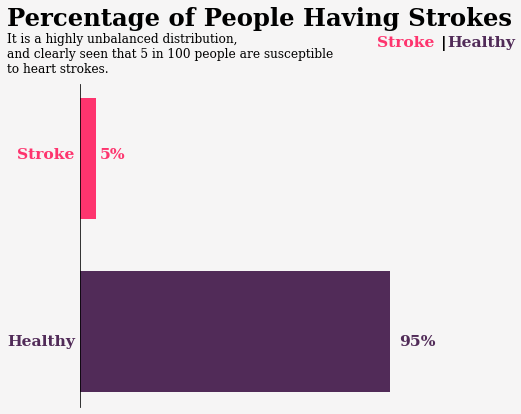

In [198]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#fe346e')
plt.text(-1150, -0.08, 'Healthy', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#512b58')
plt.text(5000, -0.08, '95%', fontname='Serif', weight='bold', fontsize=16, color='#512b58')
ax.barh([0], x.stroke[0], height=0.7, color='#512b58')
plt.text(-1000, 1, 'Stroke', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#fe346e')
plt.text(300, 1, '5%', fontname='Serif', weight='bold', fontsize=16, color='#fe346e')

fig.patch.set_facecolor(COLOR_BACKGROUND_FIG)
ax.set_facecolor(COLOR_BACKGROUND_FIG)

plt.text(-1150, 1.77, 'Percentage of People Having Strokes', fontname='Serif', fontsize=25, weight='bold', color='black')
plt.text(4650, 1.65, 'Stroke ', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#fe346e')
plt.text(5650, 1.65, '|', color='black', fontsize=16, weight='bold')
plt.text(5750, 1.65, 'Healthy', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#512b58')
plt.text(-1150, 1.5, 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible \nto heart strokes.', 
         fontname='Serif', fontsize=12.5, color='black')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Calculate and print the exact percentage
stroke_percentage = df['stroke'].value_counts(normalize=True) * 100
print("Percentage of each class in the 'stroke' column:")
print(stroke_percentage)

print("\nObservation: The dataset is highly imbalanced, with strokes accounting for less than 5% of all cases.")
print("This justifies our later use of SMOTE to balance the training data.")

**Observation:** The dataset is **highly imbalanced**. The number of patients who had a stroke (1) is far less than those who did not (0). This is a critical finding and must be addressed before modeling.

In [199]:
df.drop(columns=['glucose_cat', 'bmi_cat', 'age_cat'], inplace=True)

## 5. Data Preprocessing



### 5.1. Handle Rare Categorical Values

The gender column has one "Other" value. It's cleanest to remove this single row before proceeding


In [200]:
print("Original shape of the dataframe:", df.shape)

# Step 1: Drop the 'id' column as it's not a predictive feature
df = df.drop('id', axis=1)

# Step 2: Remove the 'Other' gender category if it exists
if 'Other' in df['gender'].unique():
    df = df[df['gender'] != 'Other']

#print("Shape after dropping ID and 'Other' gender:", df.shape)
df.head()

Original shape of the dataframe: (5110, 12)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 5.2. Categorical Feature Encoding

Machine learning models require all input features to be numeric. We will use **One-Hot Encoding** to convert categorical columns into a numerical format. The `id` column is just an identifier and is not useful for prediction, so we will drop it.

In [201]:
#strategy 1
# Use pandas get_dummies to perform one-hot encoding on categorical features
# Convert Marital Status, Residence and Gender into 0's and 1's
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
cat_columns=['gender','ever_married', 'Residence_type',]
for col in cat_columns:
    df[col]=lb.fit_transform(df[col])

df.head()
# used One Hot encoding smoking_status, work_type

data_dummies = df[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies ,dtype=int)
data_dummies.astype('int64')
df.drop(columns=['smoking_status','work_type'],inplace=True)

y=df['stroke']
df.drop(columns=['stroke'],inplace=True)
x=df.merge(data_dummies,left_index=True, right_index=True,how='left')
df_processed=x.merge(y,left_index=True, right_index=True,how='left')

print("\nShape of the dataframe after one-hot encoding:", df_processed.shape)
print("\nFirst 5 rows of the processed dataframe:")
df_processed.head()
#df_processed.info()


#stategy 2:
'''train_data_cat = df.select_dtypes("object")
train_data_num = df.select_dtypes("number")

train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()
df_processed=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
df_processed'''


Shape of the dataframe after one-hot encoding: (5109, 18)

First 5 rows of the processed dataframe:


'train_data_cat = df.select_dtypes("object")\ntrain_data_num = df.select_dtypes("number")\n\ntrain_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())\ntrain_data_cata_encoded.head()\ndf_processed=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")\ndf_processed'

### 5.3. Separating Features (X) and Target (y)

In [202]:
# 5.2. Define Features (X) and Target (y)

X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

print("Shape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)

#Scaling the features
sc = StandardScaler()
X=pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X


Shape of our features (X): (5109, 17)
Shape of our target (y): (5109,)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1.189791,1.051242,-0.328637,4.184599,0.723678,0.983884,2.706450,1.004893,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157
1,-0.840484,0.785889,-0.328637,-0.238972,0.723678,-1.016380,2.121652,-0.099142,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157
2,1.189791,1.626174,-0.328637,4.184599,0.723678,-1.016380,-0.004867,0.472358,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157
3,-0.840484,0.255182,-0.328637,-0.238972,0.723678,0.983884,1.437473,0.719142,-0.658103,-0.457417,-0.766893,2.339933,-0.384154,-0.065763,0.864444,-0.436931,-0.394157
4,-0.840484,1.581949,3.042866,-0.238972,0.723678,-1.016380,1.501297,-0.631677,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-0.840484,1.626174,3.042866,-0.238972,0.723678,0.983884,-0.494481,-0.099142,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157
5105,-0.840484,1.670400,-0.328637,-0.238972,0.723678,0.983884,0.420922,1.446507,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157
5106,-0.840484,-0.363976,-0.328637,-0.238972,0.723678,-1.016380,-0.511266,0.225574,-0.658103,-0.457417,1.303962,-0.427363,-0.384154,-0.065763,-1.156812,2.288689,-0.394157
5107,1.189791,0.343633,-0.328637,-0.238972,0.723678,-1.016380,1.328375,-0.423859,-0.658103,2.186187,-0.766893,-0.427363,-0.384154,-0.065763,0.864444,-0.436931,-0.394157


### 5.4. Train-Test Split

We split the data into a training set (to build the model) and a testing set (to evaluate the model on unseen data).

In [203]:
# Split the data, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,    # 20% of data will be for testing
    random_state=42,  # Ensures the split is the same every time we run
    stratify=y        # ESSENTIAL: Keeps the stroke proportion the same in train and test
)

print("--- Data Split ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Get the value representing the positive class (originally 1 before scaling)
positive_class = y.max()
print("\nProportion of stroke cases in original data:   ", y.value_counts(normalize=True)[positive_class])
print("Proportion of stroke cases in training data: ", y_train.value_counts(normalize=True)[positive_class])
print("Proportion of stroke cases in testing data:  ", y_test.value_counts(normalize=True)[positive_class])

--- Data Split ---
X_train shape: (4087, 17)
X_test shape: (1022, 17)

Proportion of stroke cases in original data:    0.04873752201996477
Proportion of stroke cases in training data:  0.04869097137264497
Proportion of stroke cases in testing data:   0.04892367906066536


## 6. Modeling Approaches for Imbalanced Data
- In this core part of our project, we will explore different strategies to build predictive models on our imbalanced stroke dataset. We'll first attempt to train models without explicit oversampling techniques, relying on model parameters or algorithms robust to imbalance. Subsequently, we will apply the SMOTE (Synthetic Minority Over-sampling Technique) to the training data to create a balanced dataset and compare the performance. We will also investigate the critical issue of data leakage when oversampling is misapplied. Finally, we'll develop a neural network model. Our process for each classification model will generally involve:
1. Initializing the model.
2. Training the model on the appropriately prepared training data (either original or with SMOTE).
3. Testing its performance on the original, unbalanced test data (X_test, y_test), as this represents the real-world scenario.
4. Evaluating it using our chosen metrics suitable for imbalanced datasets: F1-Score, Recall, Precision, and ROC-AUC Score.
5. Storing the results for a final comparison.

### 6.1. Model Training and Evaluation (NO SMOTE)



In this first modeling approach, we will train several classification algorithms without applying SMOTE to the training data. The objective is to establish a baseline and see how well standard models perform on the imbalanced dataset. We may explore using class weights if the algorithm supports it or choose models that are inherently more robust to class imbalance.

In [204]:
# Create a dictionary to store the results of each model
results = {}

#### Utility functions

In [205]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    RocCurveDisplay,
    balanced_accuracy_score
)


def plot_confusion(y_true, y_pred, ax=None):
    """
    Plot a confusion matrix.

    Parameters
    ----------
    y_true : array-like
        True class labels.
    y_pred : array-like
        Predicted class labels.
    labels : list of str, optional
        Names of the target classes (default: inferred).
    ax : matplotlib Axes, optional
        Axes object to draw the plot into, otherwise creates a new one.

    Returns
    -------
    ax : matplotlib Axes
    """
    labels=labels=["No Stroke", "Stroke"]
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    return disp.plot(ax=ax)


def plot_roc(y_true, y_score, ax=None):
    """
    Plot ROC curve with AUC.

    Parameters
    ----------
    y_true : array-like
        True binary labels.
    y_score : array-like
        Target scores, can either be probability estimates of the positive class,
        confidence values, or non-thresholded measure of decisions.
    ax : matplotlib Axes, optional
        Axes object to draw the plot into, otherwise creates a new one.

    Returns
    -------
    ax : matplotlib Axes
    """
    roc_disp = RocCurveDisplay.from_predictions(y_true, y_score, ax=ax)
    return ax or plt.gca()


def evaluate_model(
    clf,
    X_test,
    y_test,
    name: str = None,
    results: dict = None,
    labels: list = None,
    show_plots: bool = True
):
    """
    Evaluate a fitted classifier on test data and optionally store metrics.

    Calculates balanced accuracy, classification report, confusion matrix,
    ROC AUC, precision, recall, and F1-score.

    Parameters
    ----------
    clf : estimator
        Fitted classifier with predict and predict_proba methods.
    X_test : array-like
        Test features.
    y_test : array-like
        True labels for X_test.
    name : str, optional
        Key under which to store metrics in results.
    results : dict, optional
        Dictionary to update with computed metrics.
    labels : list of str, optional
        Class names for display (default: inferred).
    show_plots : bool, default=True
        Whether to display confusion matrix and ROC curve.

    Returns
    -------
    metrics : dict
        Dictionary with keys 'Balanced Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'.
    """
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    bal_acc = balanced_accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    metrics = {
        'Balanced Accuracy': bal_acc,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

    # Print results
    title = f"Evaluation: {name or clf.__class__.__name__}"
    print(f"--- {title} ---")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(report)

    # Plot
    if show_plots:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        plot_confusion(y_test, y_pred, ax=axes[0])
        if y_proba is not None:
            plot_roc(y_test, y_proba, ax=axes[1])
        plt.tight_layout()
        plt.show()

    # Store
    if results is not None and name is not None:
        results[name] = metrics

    return metrics


def evaluate_grid_search(
    grid_search,
    X_test,
    y_test,
    results: dict = None,
    name: str = None,
    
    show_plots: bool = True
):
    """
    Evaluate a GridSearchCV result on test data.

    Prints best parameters, cross-validation score, and evaluates on test set.

    Parameters
    ----------
    grid_search : GridSearchCV
        Fitted GridSearchCV instance.
    X_test : array-like
        Test features.
    y_test : array-like
        True labels.
    results : dict, optional
        Dictionary to update with computed metrics.
    name : str, optional
        Name under which to store metrics in results.
    labels : list of str, optional
        Class names for display.
    show_plots : bool, default=True
        Whether to display plots.

    Returns
    -------
    metrics : dict
    """
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"CV mean score: {grid_search.best_score_:.4f}")
    return evaluate_model(
        clf=grid_search.best_estimator_,
        X_test=X_test,
        y_test=y_test,
        name=name or grid_search.best_estimator_.__class__.__name__,
        results=results,
        
        show_plots=show_plots
    )








#### 6.1.1. Model 1: Logistic Regression (Baseline)

Logistic Regression is a linear model that is an excellent starting point for any classification task. It estimates probabilities and is very efficient, making it the perfect baseline to compare against more complex models.

--- Evaluation: LogisticRegression ---
Balanced Accuracy: 0.5100
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



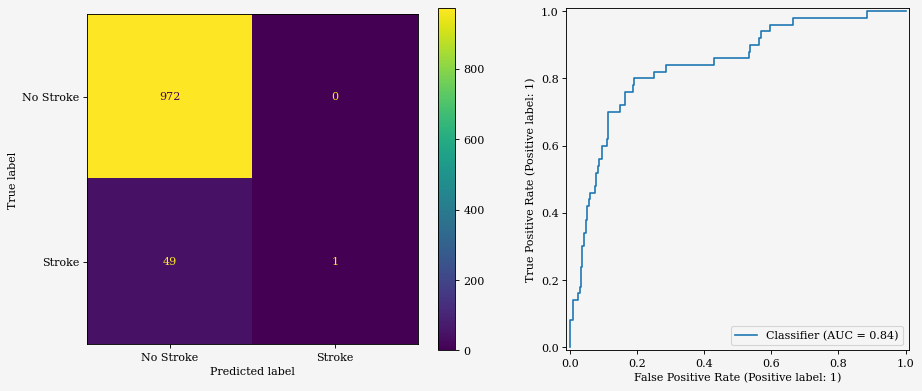

{'LogisticRegression': {'Balanced Accuracy': 0.51, 'Precision': 1.0, 'Recall': 0.02, 'F1': 0.0392156862745098, 'ROC AUC': 0.8390946502057613}}


In [206]:
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize the Logistic Regression model
# We set max_iter=1000 to ensure the model has enough iterations to converge, preventing a common warning.
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the original, unbalanced test set
y_pred_log_reg = log_reg.predict(X_test)

# Predict probabilities, which are needed for the ROC-AUC score
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1] # We only need the probabilities for the 'positive' class (stroke=1)

# Print the Classification Report
# This report gives a great summary of precision, recall, and f1-score.
metrics = evaluate_model(
    clf=log_reg,
    X_test=X_test,
    y_test=y_test,
    name="LogisticRegression",
    results=results,
    show_plots=True                  # set False if running in non-interactive mode
)
print(results)


#### 6.1.2. Model 2: K-Nearest Neighbors (KNN)

Now, follow the same 4 steps as above for the KNN model.

In [207]:

from sklearn.model_selection import cross_val_score

k_values = list(range(1, 11))

# Use cross-validation to evaluate the performance of each k value
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='balanced_accuracy')
    cv_scores.append(scores.mean())

# Find the k value that gives the best performance
best_k = k_values[np.argmax(cv_scores)]
print("Best k value:", best_k)

plt.plot(k_values, cv_scores);
plt.title('Cross-validation Scores for k-NN');
plt.xticks(k_values);
plt.xlabel('Neighbors');
plt.ylabel('Cross-validation Score');
plt.tight_layout();
plt.show();
print(f"""

we can see ({best_k}) has the best score

""")





params = {
    "n_neighbors": list(range(1, 11)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "chebyshev", "minkowski", "manhattan"]
}

knn_clf = KNeighborsClassifier()

knn = GridSearchCV(knn_clf, params, scoring="balanced_accuracy")
knn.fit(X_train, y_train)



# Evaluate best‐found estimator on the test set
evaluate_grid_search(
    grid_search=knn,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="K-Nearest Neighbors",
    show_plots=True
)


KeyboardInterrupt: 

#### 6.1.3. Model 3: Decision Tree
The Decision Tree is a non-linear model that works by splitting the data into branches based on feature values, creating a tree-like flow of decisions. It's highly interpretable and often forms the basis for more powerful ensemble models like Random Forest.

--- Evaluation: DecisionTree ---
Balanced Accuracy: 0.7583
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.78      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.74      0.81      1022



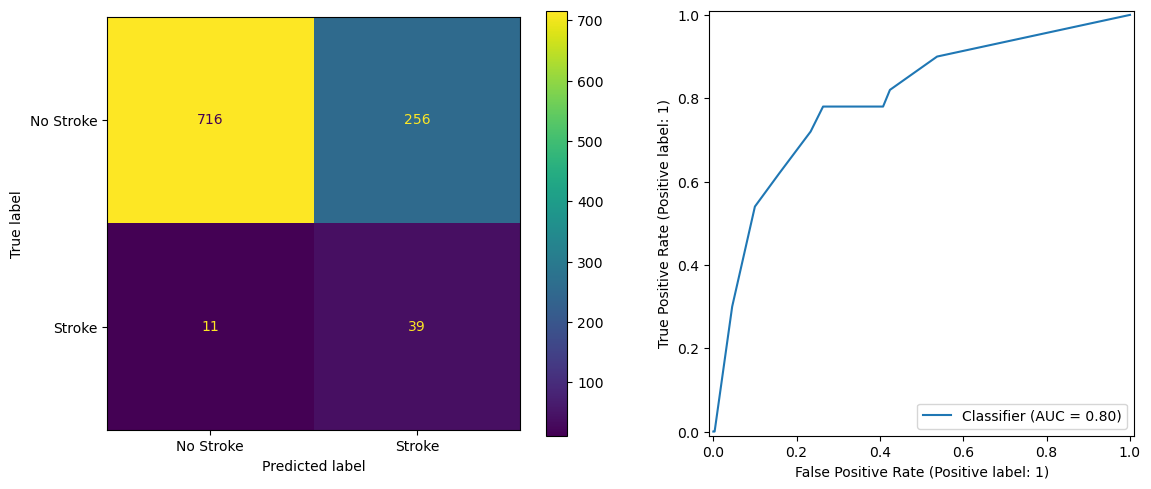

{'Balanced Accuracy': 0.7583127572016461,
 'Precision': 0.13220338983050847,
 'Recall': 0.78,
 'F1': 0.22608695652173913,
 'ROC AUC': 0.7985905349794238}

In [ ]:
# Initialize the Decision Tree Classifier
# We set a random_state to ensure the results are the same every time we run the code.
# class_weight=balanced adjusts weights inversely proportional to class frequencies
tree_clf = DecisionTreeClassifier(
    max_depth=5, random_state=42, class_weight="balanced")
tree_clf.fit(X_train, y_train)

evaluate_model(
    clf=tree_clf,
    X_test=X_test,
    y_test=y_test,
    name="DecisionTree",
    results=results,
    show_plots=True
)



Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None}
CV mean score: 0.7549
--- Evaluation: DecisionTree-GridSearch ---
Balanced Accuracy: 0.6967
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       972
           1       0.09      0.84      0.16        50

    accuracy                           0.57      1022
   macro avg       0.54      0.70      0.43      1022
weighted avg       0.94      0.57      0.68      1022



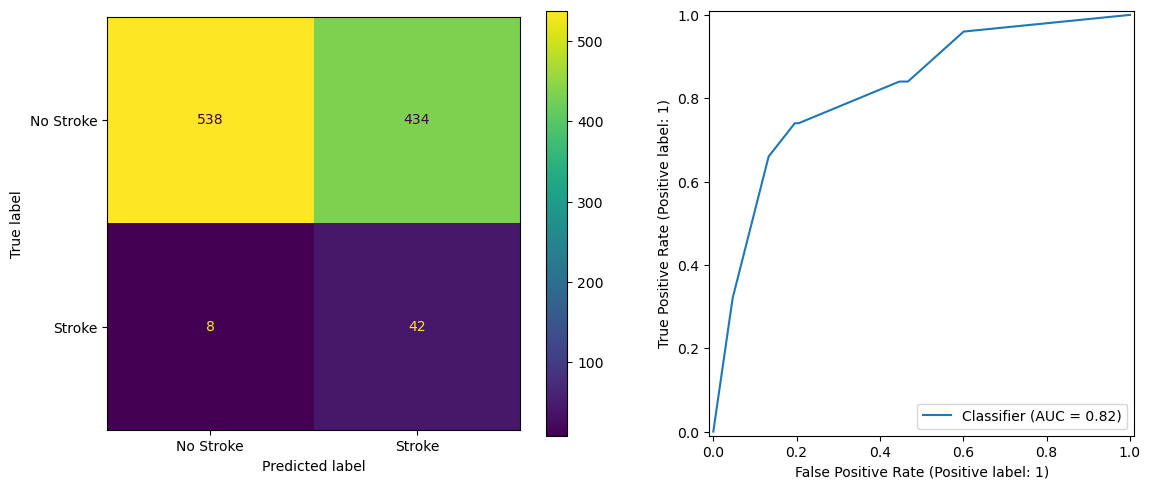

{'Balanced Accuracy': 0.6967489711934156,
 'Precision': 0.08823529411764706,
 'Recall': 0.84,
 'F1': 0.1596958174904943,
 'ROC AUC': 0.8203806584362141}

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(1, 10)),
    "max_features": [None, "log2", "sqrt"],
}


# class_weight=balanced adjusts weights inversely proportional to class frequencies
tree_clf = DecisionTreeClassifier(random_state=42, class_weight="balanced")
grid_tree_clf = GridSearchCV(tree_clf, params, scoring="balanced_accuracy")
grid_tree_clf.fit(X_train, y_train)
evaluate_grid_search(
    grid_search=grid_tree_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="DecisionTree-GridSearch",
    show_plots=True
)

#### 6.1.4. Model 4: SVM

In [ ]:
#@title SVM takes a lot of time skipped by default
execute_svm = False #@param {type:"boolean"}
from sklearn.svm import SVC

if execute_svm:
  params = {
      "C": [1, 10, 50],
      "gamma": ["scale", 1, 0.1, 0.01],
      "kernel": ["linear", "rbf", "poly"],
      "degree": [2, 3, 4]
  }

  svm_clf = SVC(random_state=42, class_weight="balanced", probability=True)

  grid_svm_clf = GridSearchCV(svm_clf, params, scoring="balanced_accuracy")
  grid_svm_clf.fit(X_train, y_train)

  evaluate_grid_search(
          grid_search=grid_svm_clf,
          X_test=X_test,
          y_test=y_test,
          results=results,
          name="SVM",
          show_plots=True
      )

The resulting accuracy of the best model is high, but it's worth noticing that a considerable amount of time is required for training and cross-validation. 

#### 6.1.6. Model 6:Naive Bayes

In [ ]:
params = {
    "var_smoothing": np.logspace(0, -9, num=300)
}

gnb_clf = GaussianNB()

grid_gnb_clf = GridSearchCV(gnb_clf, params, scoring="balanced_accuracy")
grid_gnb_clf.fit(X_train, y_train)
evaluate_grid_search(
    grid_search=grid_gnb_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="GaussianNB-GridSearch",
    show_plots=True
)

KeyboardInterrupt: 

#### 6.1.7. Model 7: Bagging (Ensemble)

--- Evaluation: BaggingClassifier ---
Balanced Accuracy: 0.4964
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.94      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



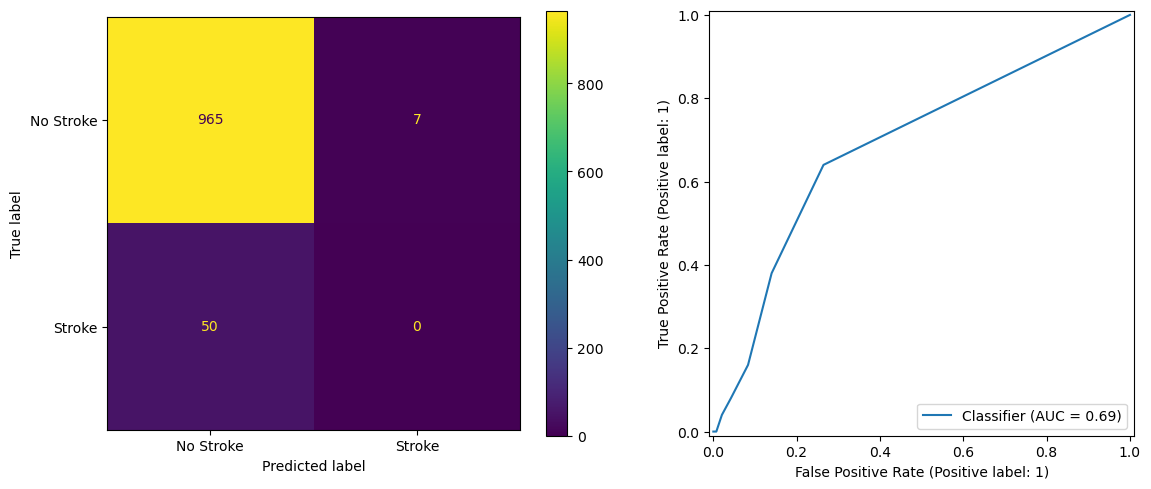

{'Balanced Accuracy': 0.4963991769547325,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1': 0.0,
 'ROC AUC': 0.6884567901234568}

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(random_state=42)
bag_clf.fit(X_train, y_train)
evaluate_model(
    clf=bag_clf,
    X_test=X_test,
    y_test=y_test,
    name="BaggingClassifier",
    results=results,
    show_plots=True
)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

params = {
    "n_estimators": [100, 200, 500],
    "max_samples": [0.2, 0.5, 1.0],
    "max_features": [0.5, 1.0],
}

grid_bb_clf = GridSearchCV(
    BalancedBaggingClassifier(random_state=42),
    params,
    scoring="balanced_accuracy"
)

grid_bb_clf.fit(X_train, y_train)
evaluate_grid_search(
    grid_search=grid_bb_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="BalancedBaggingClassifier-GridSearch",
    show_plots=True
)

KeyboardInterrupt: 

#### 6.1.8. Model 8: Random Forest (Ensemble)

This is our first ensemble model.

--- Evaluation: RandomForest ---
Balanced Accuracy: 0.4995
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



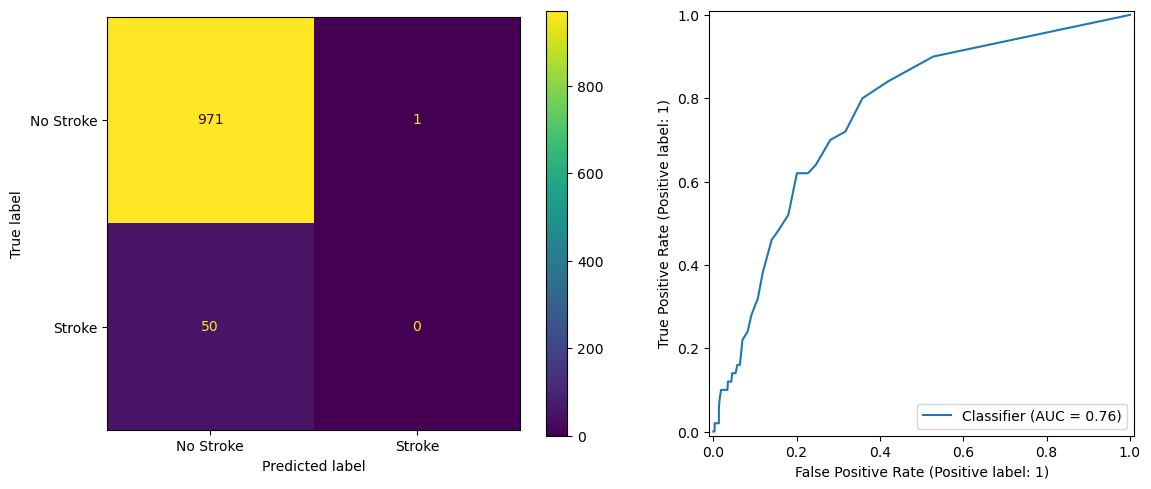

{'Balanced Accuracy': 0.49948559670781895,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1': 0.0,
 'ROC AUC': 0.7635288065843621}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_clf.fit(X_train, y_train)
evaluate_model(
    clf=rf_clf,
    X_test=X_test,
    y_test=y_test,
    name="RandomForest",
    results=results,
    show_plots=True
)

--- Evaluation: ExtraTrees ---
Balanced Accuracy: 0.5159
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.20      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.58      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022



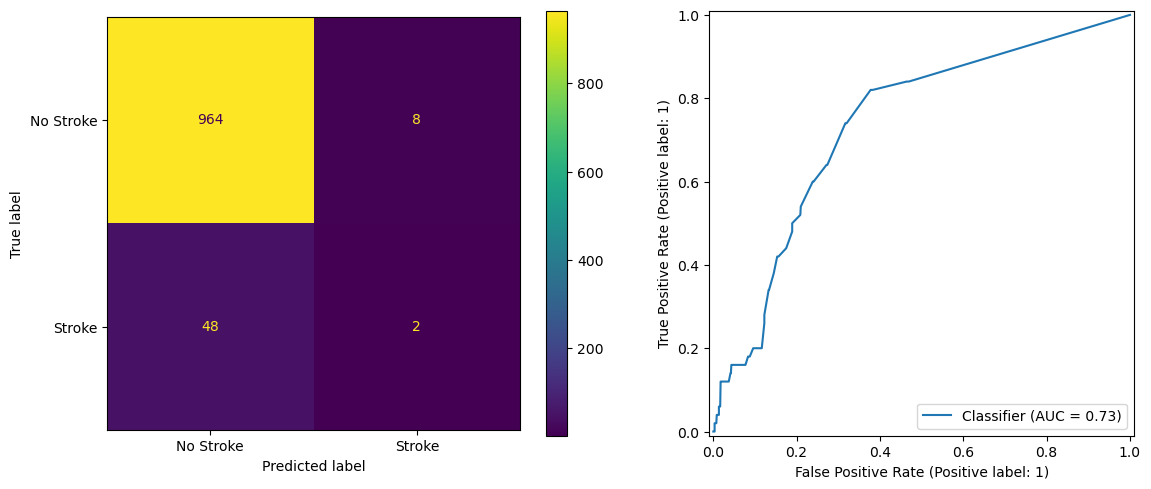

{'Balanced Accuracy': 0.5158847736625515,
 'Precision': 0.2,
 'Recall': 0.04,
 'F1': 0.06666666666666667,
 'ROC AUC': 0.7349382716049382}

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(random_state=42, class_weight="balanced")
et_clf.fit(X_train, y_train)
evaluate_model(
    clf=et_clf,
    X_test=X_test,
    y_test=y_test,
    name="ExtraTrees",
    results=results,
    show_plots=True
)

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}
CV mean score: 0.7787
--- Evaluation: BalancedRandomForest-GridSearch ---
Balanced Accuracy: 0.7423
              precision    recall  f1-score   support

           0       0.99      0.66      0.79       972
           1       0.11      0.82      0.20        50

    accuracy                           0.67      1022
   macro avg       0.55      0.74      0.50      1022
weighted avg       0.94      0.67      0.76      1022



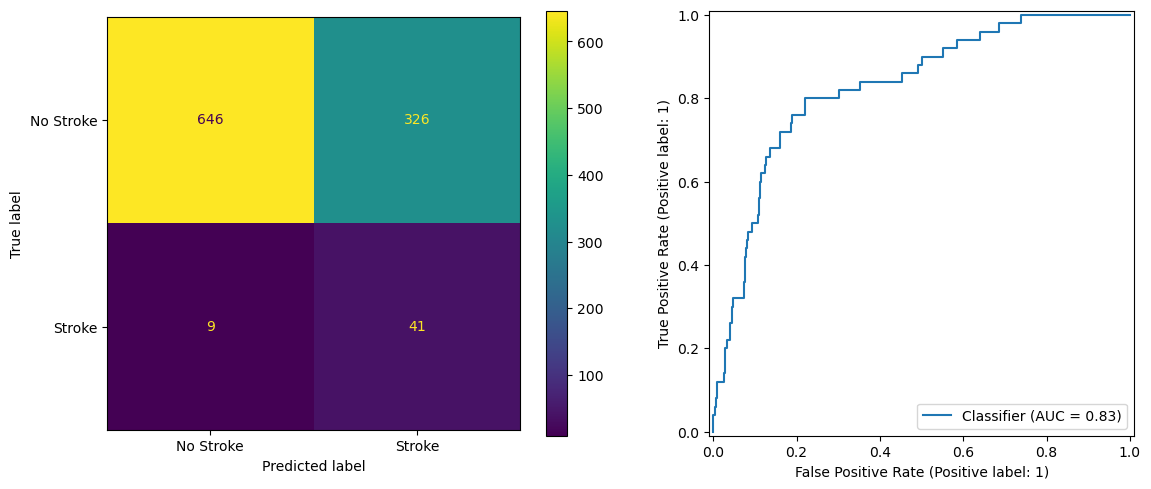

{'Balanced Accuracy': 0.7423045267489712,
 'Precision': 0.11171662125340599,
 'Recall': 0.82,
 'F1': 0.19664268585131894,
 'ROC AUC': 0.8281893004115226}

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

params = {
    "n_estimators": [200, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 10)),
    "max_features": ["log2", "sqrt"],
}

grid_brf_clf = GridSearchCV(
    BalancedRandomForestClassifier(random_state=42, oob_score=True),
    params,
    scoring="balanced_accuracy"
)

grid_brf_clf.fit(X_train, y_train)
evaluate_grid_search(
    grid_search=grid_brf_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="BalancedRandomForest-GridSearch",
    show_plots=True
)


#### 6.1.9. Model 9: Gradient Boosting (Ensemble)

This is another powerful ensemble model.

--- Evaluation: GradientBoosting ---
Balanced Accuracy: 0.4979
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



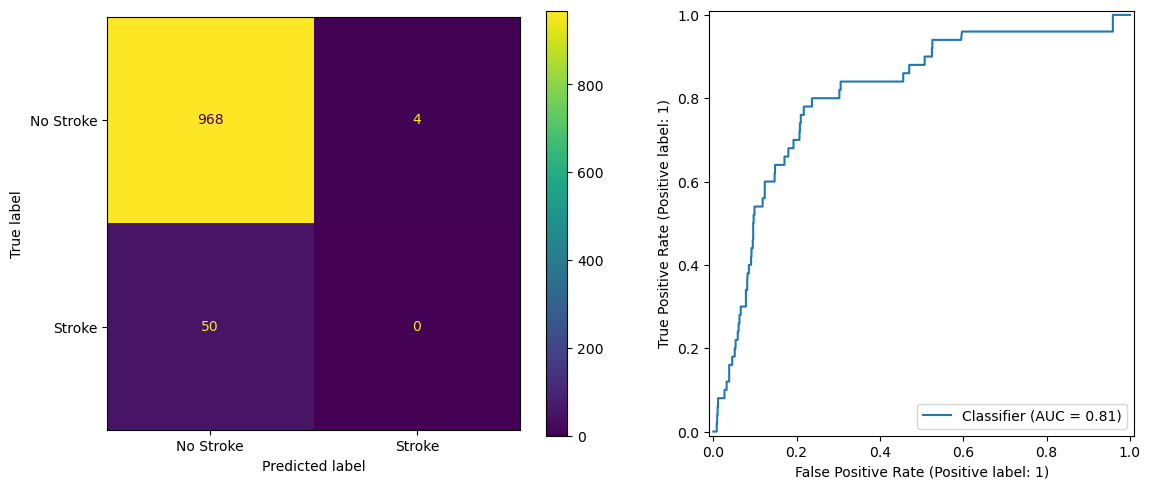

{'Balanced Accuracy': 0.49794238683127573,
 'Precision': 0.0,
 'Recall': 0.0,
 'F1': 0.0,
 'ROC AUC': 0.8094547325102881}

In [ ]:
# 1. Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
evaluate_model(
    clf=gb,
    X_test=X_test,
    y_test=y_test,
    name="GradientBoosting",
    results=results,
    show_plots=True
)


Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 300, 'subsample': 1.0}
CV mean score: 0.5386
--- Evaluation: GradientBoosting-GridSearch ---
Balanced Accuracy: 0.5569
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.50      0.12      0.19        50

    accuracy                           0.95      1022
   macro avg       0.73      0.56      0.58      1022
weighted avg       0.93      0.95      0.94      1022



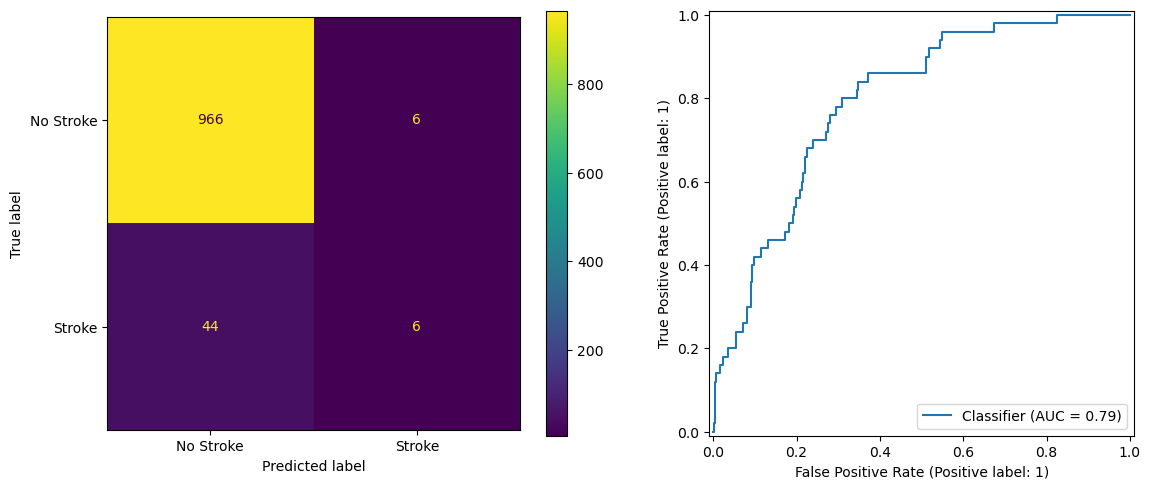

{'Balanced Accuracy': 0.5569135802469136,
 'Precision': 0.5,
 'Recall': 0.12,
 'F1': 0.1935483870967742,
 'ROC AUC': 0.7928806584362139}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.8, 1.0],
    "max_features": ["sqrt", "log2", None]
}

gb_clf = GradientBoostingClassifier(random_state=42)
grid_gb_clf = GridSearchCV(gb_clf, params, scoring="balanced_accuracy")
grid_gb_clf.fit(X_train, y_train)

evaluate_grid_search(
    grid_search=grid_gb_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="GradientBoosting-GridSearch",
    show_plots=True
)

#### 6.1.10. Model 10: XGBoost (Ensemble)

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way. 

To work with imbalanced data sets, it's recommended to set the `scale_pos_weight` to the ratio of negative instances to the positive ones.

In [ ]:
from collections import Counter

counter = Counter(y)
estimate = counter[0] / counter[1]
print("Estimate: %.3f" % estimate)


Estimate: 19.518


Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
CV mean score: 0.7739
--- Evaluation: XGBoost-GridSearch ---
Balanced Accuracy: 0.7457
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       972
           1       0.12      0.80      0.21        50

    accuracy                           0.70      1022
   macro avg       0.55      0.75      0.51      1022
weighted avg       0.94      0.70      0.78      1022



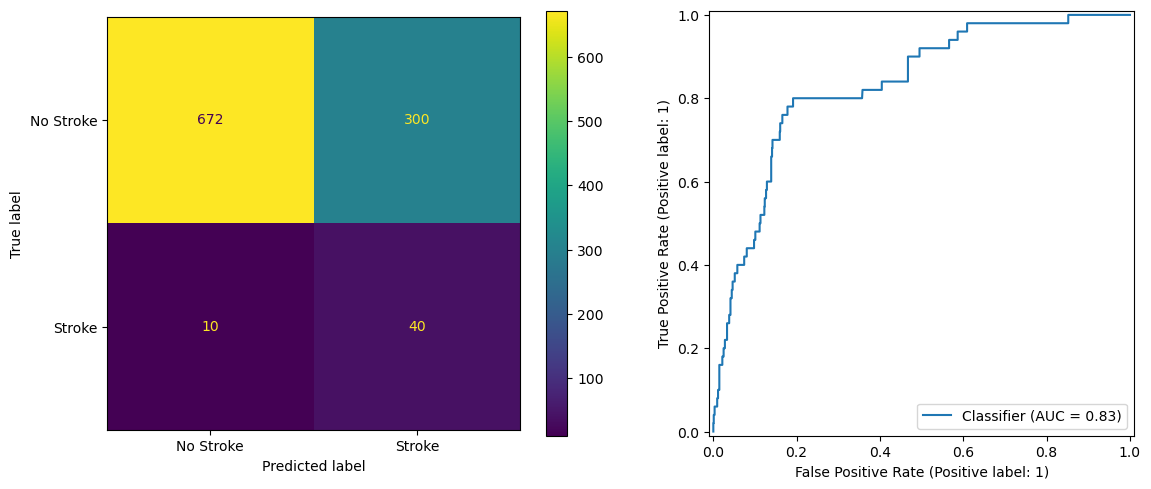

{'Balanced Accuracy': 0.745679012345679,
 'Precision': 0.11764705882352941,
 'Recall': 0.8,
 'F1': 0.20512820512820512,
 'ROC AUC': 0.8313683127572016}

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42, scale_pos_weight=estimate,
                        objective="binary:logistic", verbosity=0)

params = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5, 10],
    "learning_rate": [0.1, 0.01],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.5, 0.8]
}

grid_xgb_clf = GridSearchCV(xgb_clf, params, scoring="balanced_accuracy")
grid_xgb_clf.fit(X_train, y_train)
evaluate_grid_search(
    grid_search=grid_xgb_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="XGBoost-GridSearch",
    show_plots=True
)

#### 6.1.11. Model 11: EasyEnsemble (Ensemble)

Best parameters: {'n_estimators': 50}
CV mean score: 0.7704
--- Evaluation: EasyEnsemble-GridSearch ---
Balanced Accuracy: 0.7472
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       972
           1       0.11      0.84      0.20        50

    accuracy                           0.66      1022
   macro avg       0.55      0.75      0.49      1022
weighted avg       0.94      0.66      0.76      1022



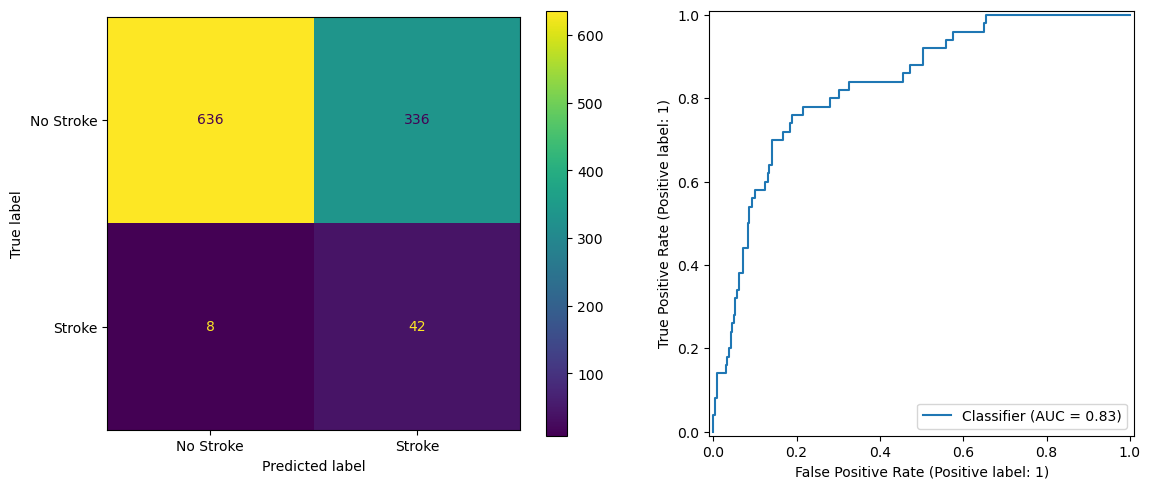

{'Balanced Accuracy': 0.7471604938271605,
 'Precision': 0.1111111111111111,
 'Recall': 0.84,
 'F1': 0.19626168224299065,
 'ROC AUC': 0.8344855967078189}

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier

params = {
    "n_estimators": [50, 100, 200],
}

grid_ee_clf = GridSearchCV(
    EasyEnsembleClassifier(random_state=42),
    params,
    scoring="balanced_accuracy"
)

grid_ee_clf.fit(X_train, y_train)
evaluate_grid_search(
    grid_search=grid_ee_clf,
    X_test=X_test,
    y_test=y_test,
    results=results,
    name="EasyEnsemble-GridSearch",
    show_plots=True
)

#### 6.1.12. Model 12: Voting (Ensemble)

--- Evaluation: Hard Voting Classifier ---
Balanced Accuracy: 0.5064
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.12      0.02      0.03        50

    accuracy                           0.95      1022
   macro avg       0.54      0.51      0.50      1022
weighted avg       0.91      0.95      0.93      1022



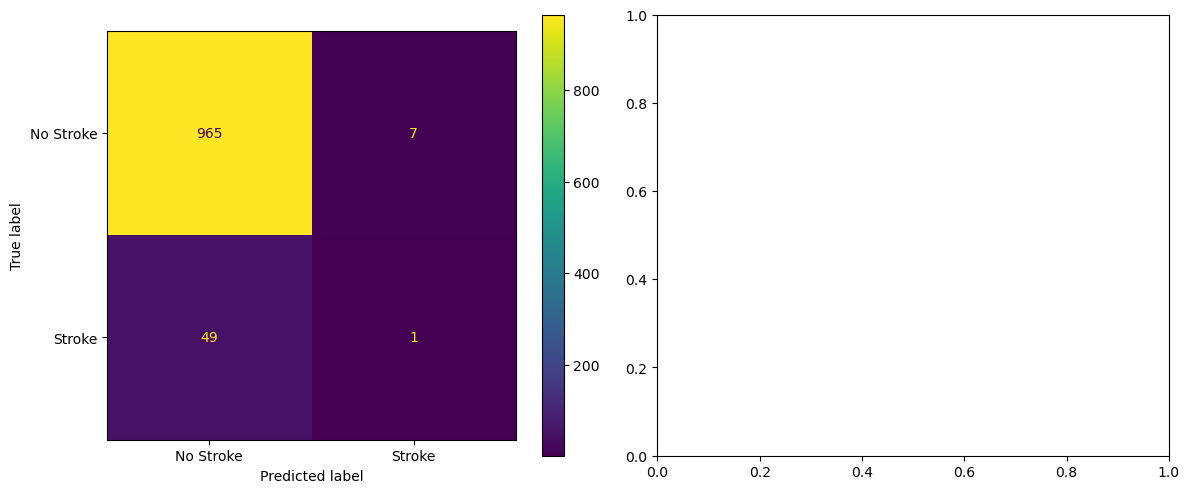

{'Balanced Accuracy': 0.5063991769547325,
 'Precision': 0.125,
 'Recall': 0.02,
 'F1': 0.034482758620689655,
 'ROC AUC': None}

In [ ]:
from sklearn.ensemble import VotingClassifier
def get_models():
    """
    Returns a list of tuples containing model names and their instances.
    """
    return [
        
        ("Extra Trees", et_clf),
        ("Gradient Boosting", gb),
        ("XGBoost", xgb_clf),
        ("Bagging", bag_clf),
        ("Balanced Random Forest", grid_brf_clf.best_estimator_),
        ("EasyEnsemble", grid_ee_clf.best_estimator_),
        
    ]
hard_voting_clf = VotingClassifier(estimators=get_models(),voting="hard")
hard_voting_clf.fit(X_train, y_train)
evaluate_model(
    clf=hard_voting_clf,
    X_test=X_test,
    y_test=y_test,
    name="Hard Voting Classifier",
    results=results,
    show_plots=True
)

#### 6.1.12. RESULTS

In [ ]:
import pandas as pd

# Convert the results dictionary to a DataFrame for easier sorting and display
results_df = pd.DataFrame(results).T

# Display all metrics for all models in one table, sorted by Balanced Accuracy (or any metric you prefer)
display(results_df.sort_values(by="Balanced Accuracy", ascending=False))


,Balanced Accuracy,Precision,Recall,F1,ROC AUC
DecisionTree,0.758313,0.132203,0.78,0.226087,0.798591
BalancedBaggingClassifier-GridSearch,0.752366,0.122324,0.80,0.212202,0.818848
EasyEnsemble-GridSearch,0.747160,0.111111,0.84,0.196262,0.834486
XGBoost-GridSearch,0.745679,0.117647,0.80,0.205128,0.831368
BalancedRandomForest-GridSearch,0.742305,0.111717,0.82,0.196643,0.828189
GaussianNB-GridSearch,0.705905,0.103933,0.74,0.182266,0.794506
DecisionTree-GridSearch,0.696749,0.088235,0.84,0.159696,0.820381
GradientBoosting-GridSearch,0.556914,0.500000,0.12,0.193548,0.792881
K-Nearest Neighbors,0.533539,0.135135,0.10,0.114943,0.533539
ExtraTrees,0.515885,0.200000,0.04,0.066667,0.734938


### 6.2. Model with SMOTE

Now, we will address the class imbalance by applying the SMOTE technique. Importantly, SMOTE will be applied only to the training data after the train-test split to prevent data leakage. We will then train the same set of models (or a selection) on this oversampled training data and evaluate their performance on the original, untouched test set. This will allow us to assess the impact of SMOTE on model performance.
- **Synthetic Minority Over-sampling Technique (SMOTE)**: creates new, synthetic data points for the minority class (stroke cases).

#### 6.2.1. Handling Class Imbalance with SMOTE



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

# Create copies of the training feature matrix and target variable to avoid altering the original data
X_tmp = X_train.copy()
y_tmp = y_train.copy()

# Since all features are numeric after encoding, use SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)


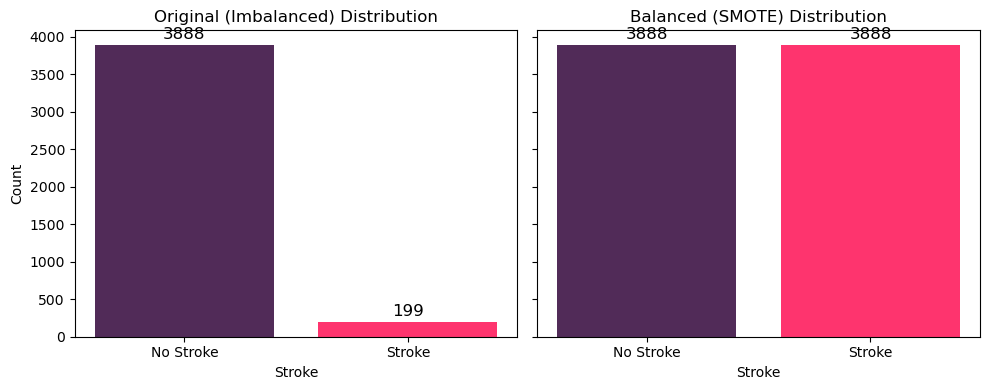

In [ ]:


# Original (imbalanced) distribution
orig_counts = y_train.value_counts().sort_index()
# Balanced (SMOTE) distribution
smote_counts = y_smote.value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Plot original
axes[0].bar(orig_counts.index.astype(str), orig_counts.values, color=['#512b58', '#fe346e'])
axes[0].set_title('Original (Imbalanced) Distribution')
axes[0].set_xlabel('Stroke')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Stroke', 'Stroke'])

# Plot SMOTE
axes[1].bar(smote_counts.index.astype(str), smote_counts.values, color=['#512b58', '#fe346e'])
axes[1].set_title('Balanced (SMOTE) Distribution')
axes[1].set_xlabel('Stroke')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Stroke', 'Stroke'])

for ax, counts in zip(axes, [orig_counts, smote_counts]):
    for i, v in enumerate(counts.values):
        ax.text(i, v + max(counts.values)*0.01, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

#### 6.2.2. Model training

In this section, we will train the models used in the classification framework for predicting stroke occurrence, as outlined in the referenced paper. We will then compute key evaluation metrics, including Precision, Recall, F-Measure, AUC, and Accuracy, which are widely recognized in the relevant literature for assessing model performance.

In [ ]:
ResultsSmote={}



=== Naive Bayes ===
--- Evaluation: Naive Bayes ---
Balanced Accuracy: 0.6598
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       972
           1       0.07      0.98      0.13        50

    accuracy                           0.37      1022
   macro avg       0.53      0.66      0.32      1022
weighted avg       0.95      0.37      0.49      1022



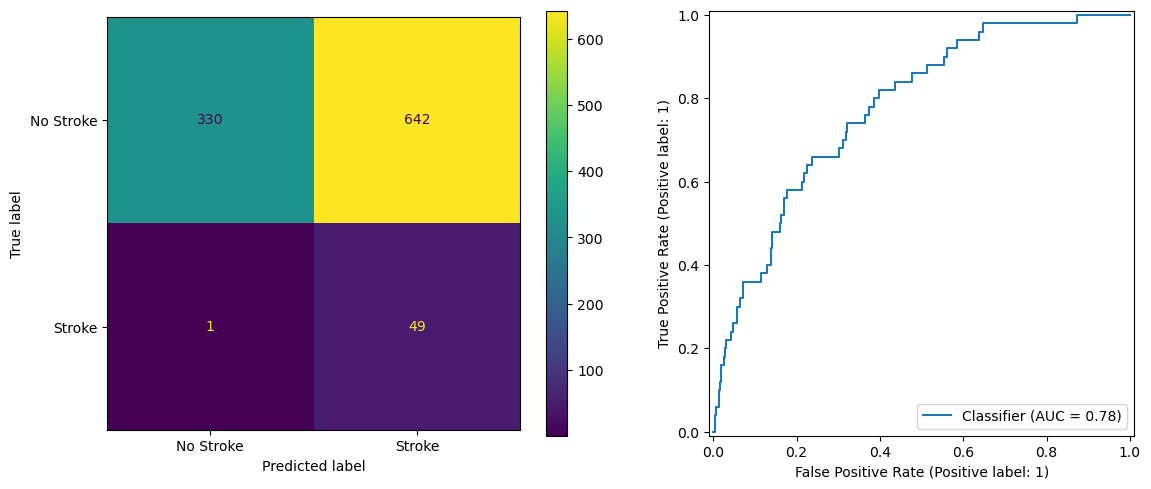


=== Logistic Regression ===
--- Evaluation: Logistic Regression ---
Balanced Accuracy: 0.7073
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       972
           1       0.09      0.86      0.16        50

    accuracy                           0.57      1022
   macro avg       0.54      0.71      0.44      1022
weighted avg       0.94      0.57      0.68      1022



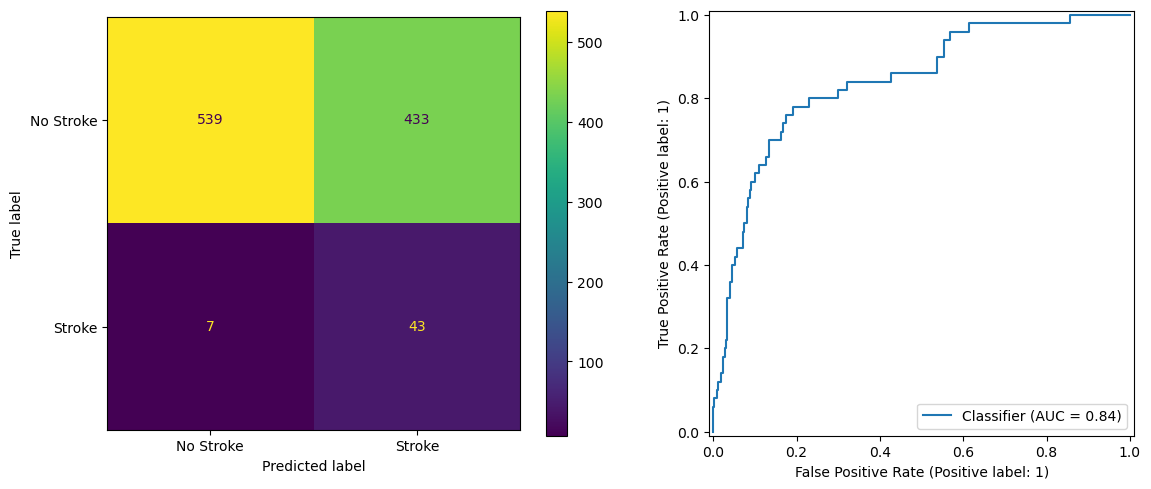


=== SGD ===
--- Evaluation: SGD ---
Balanced Accuracy: 0.6980
              precision    recall  f1-score   support

           0       0.99      0.54      0.69       972
           1       0.09      0.86      0.16        50

    accuracy                           0.55      1022
   macro avg       0.54      0.70      0.43      1022
weighted avg       0.94      0.55      0.67      1022



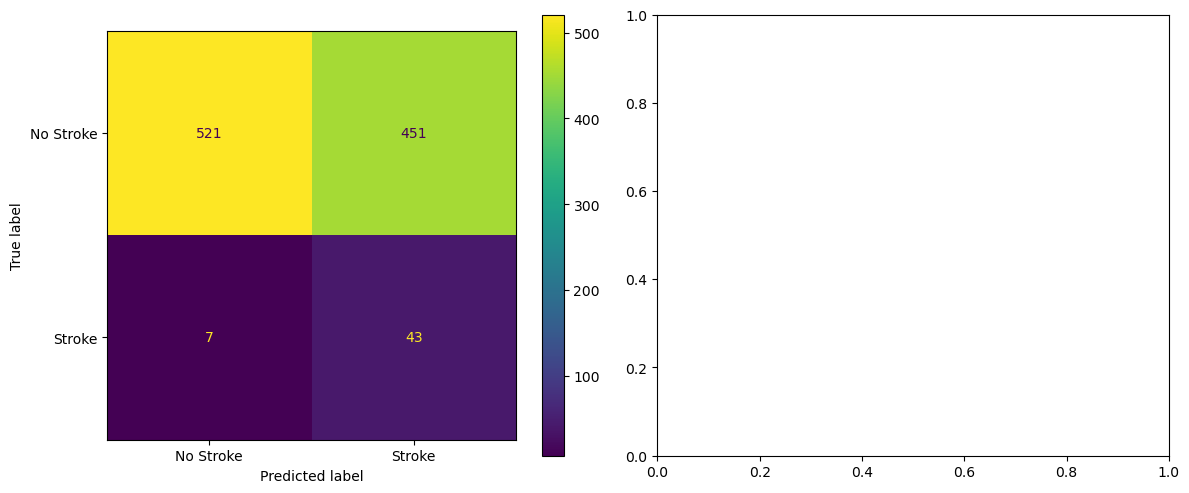


=== KNN ===
--- Evaluation: KNN ---
Balanced Accuracy: 0.5219
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       972
           1       0.07      0.16      0.09        50

    accuracy                           0.85      1022
   macro avg       0.51      0.52      0.51      1022
weighted avg       0.91      0.85      0.88      1022



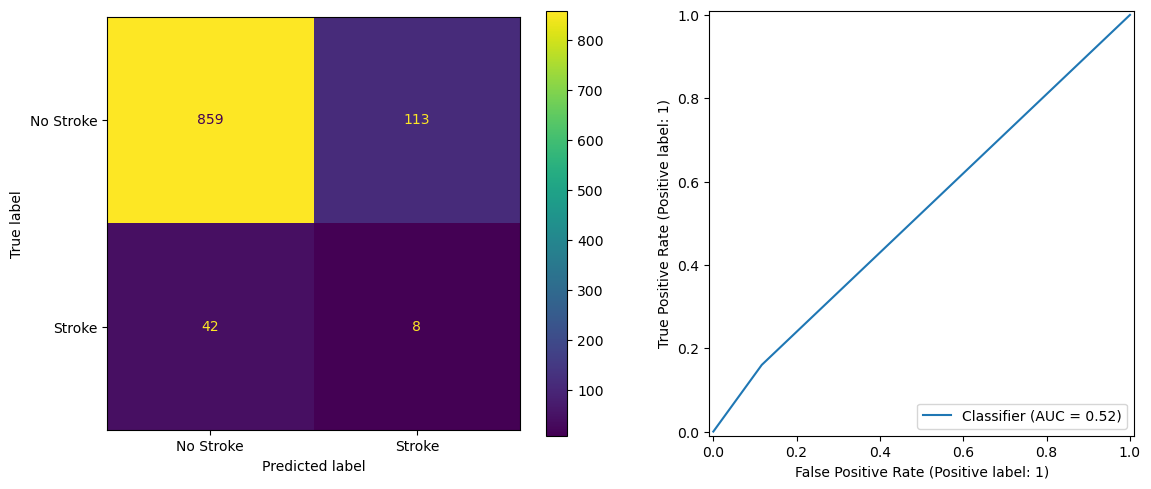


=== Decision Tree ===
--- Evaluation: Decision Tree ---
Balanced Accuracy: 0.5487
              precision    recall  f1-score   support

           0       0.96      0.34      0.50       972
           1       0.06      0.76      0.10        50

    accuracy                           0.36      1022
   macro avg       0.51      0.55      0.30      1022
weighted avg       0.92      0.36      0.48      1022



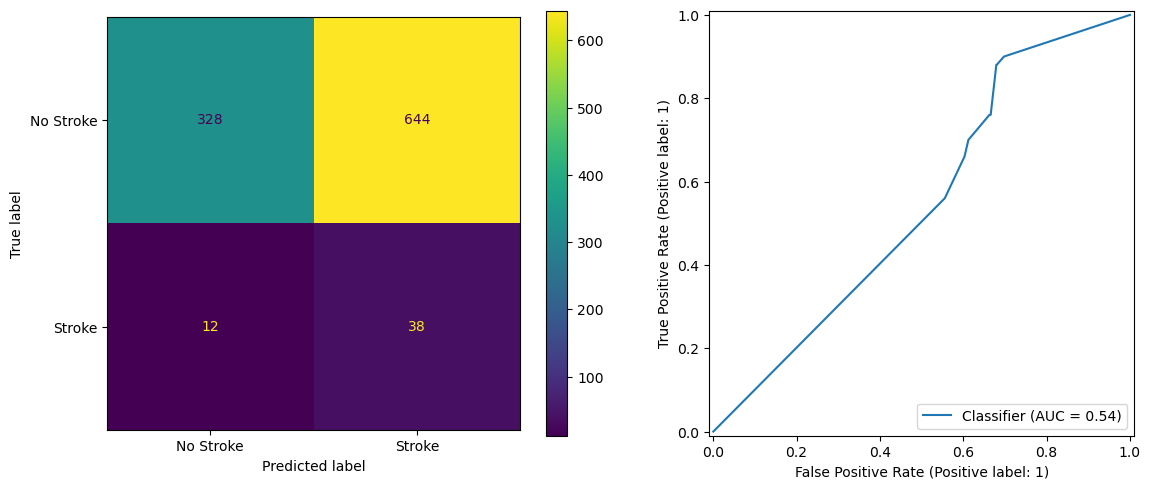


=== Random Forest ===
--- Evaluation: Random Forest ---
Balanced Accuracy: 0.5710
              precision    recall  f1-score   support

           0       1.00      0.14      0.25       972
           1       0.06      1.00      0.11        50

    accuracy                           0.18      1022
   macro avg       0.53      0.57      0.18      1022
weighted avg       0.95      0.18      0.24      1022



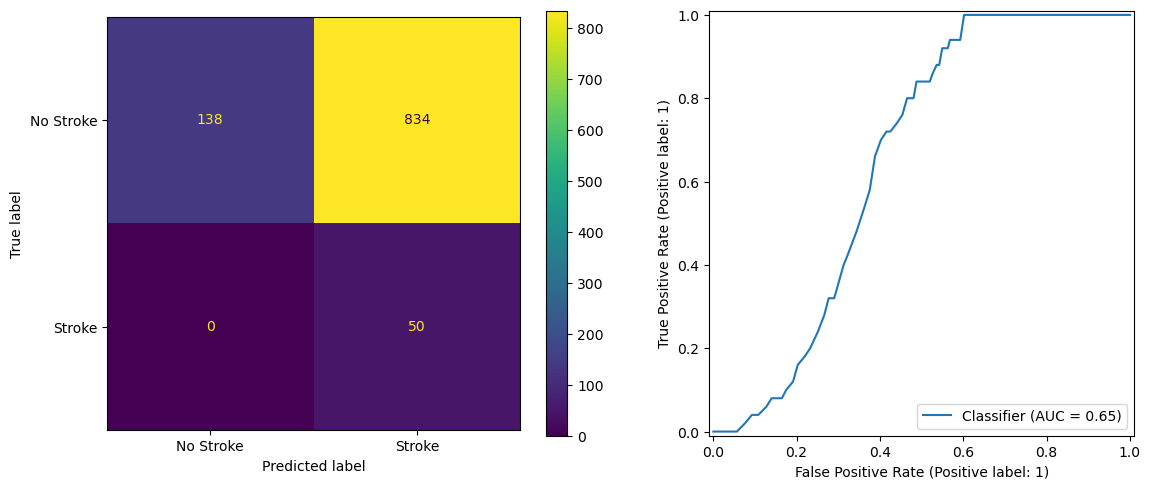


=== Extra Trees ===
--- Evaluation: Extra Trees ---
Balanced Accuracy: 0.5154
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       972
           1       0.05      0.50      0.09        50

    accuracy                           0.53      1022
   macro avg       0.50      0.52      0.39      1022
weighted avg       0.91      0.53      0.65      1022



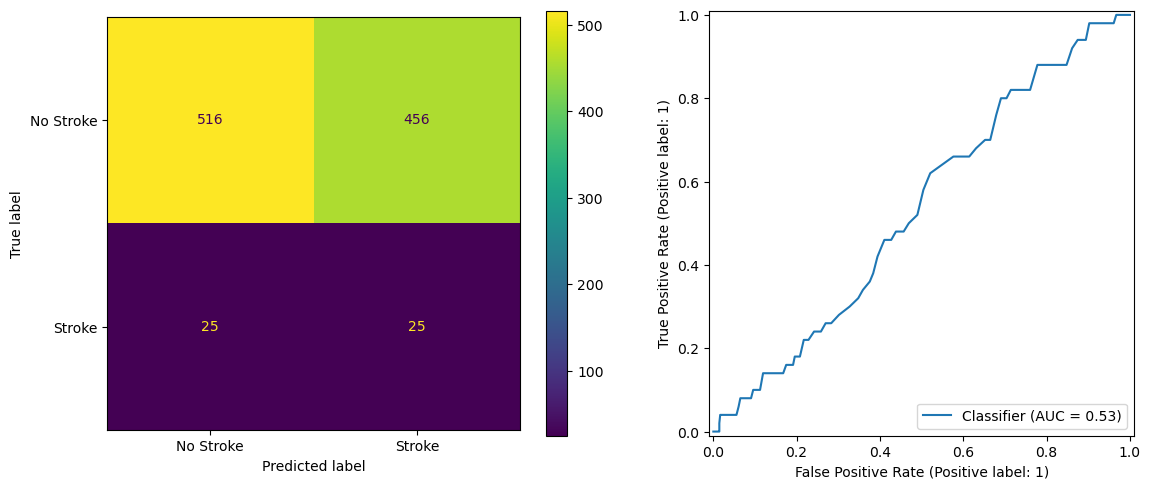


=== Gradient Boosting ===
--- Evaluation: Gradient Boosting ---
Balanced Accuracy: 0.4967
              precision    recall  f1-score   support

           0       0.93      0.01      0.03       972
           1       0.05      0.98      0.09        50

    accuracy                           0.06      1022
   macro avg       0.49      0.50      0.06      1022
weighted avg       0.89      0.06      0.03      1022



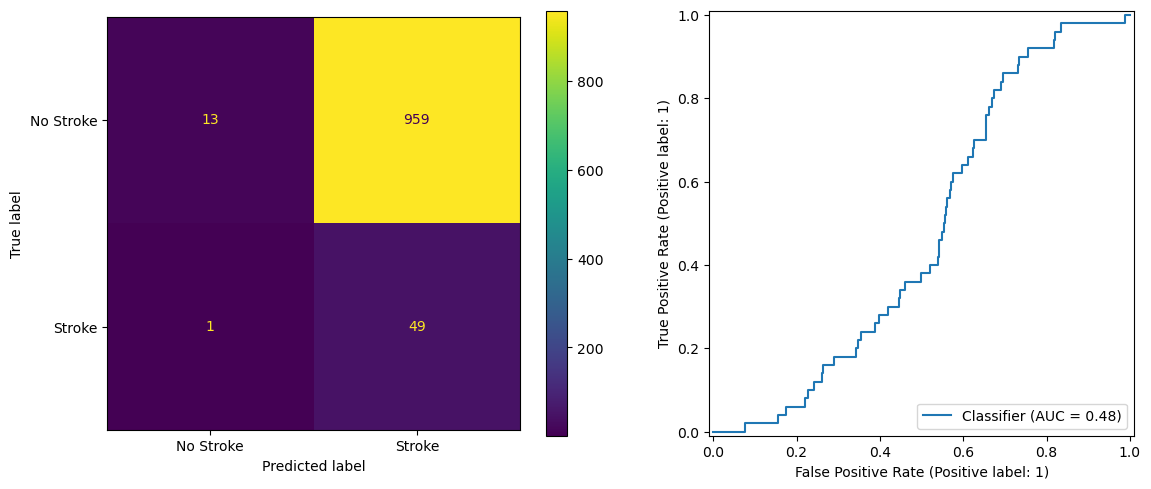


=== XGBoost ===
--- Evaluation: XGBoost ---
Balanced Accuracy: 0.6271
              precision    recall  f1-score   support

           0       1.00      0.25      0.41       972
           1       0.06      1.00      0.12        50

    accuracy                           0.29      1022
   macro avg       0.53      0.63      0.26      1022
weighted avg       0.95      0.29      0.39      1022



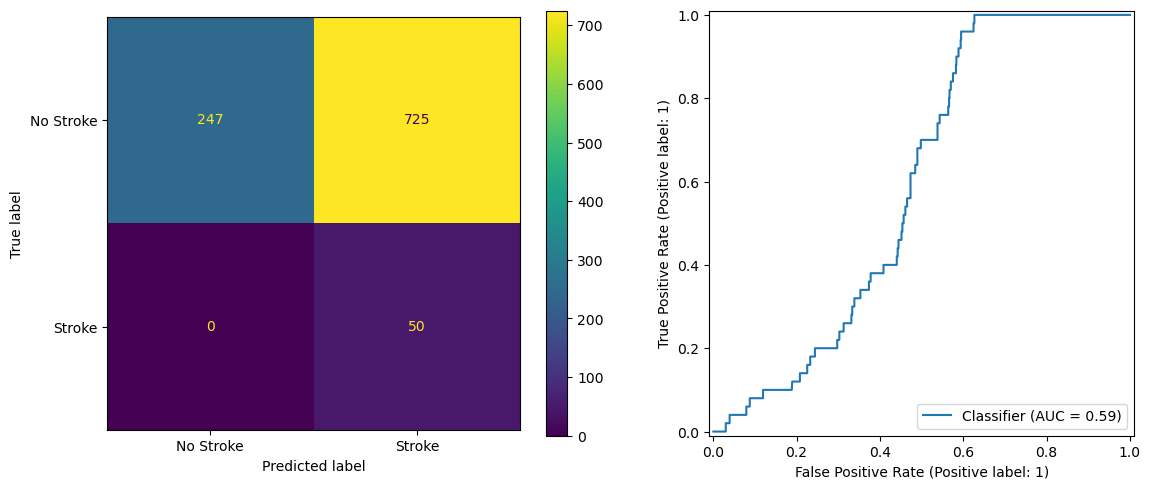


=== SVM ===
--- Evaluation: SVM ---
Balanced Accuracy: 0.5417
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       972
           1       0.07      0.28      0.11        50

    accuracy                           0.78      1022
   macro avg       0.51      0.54      0.49      1022
weighted avg       0.91      0.78      0.84      1022



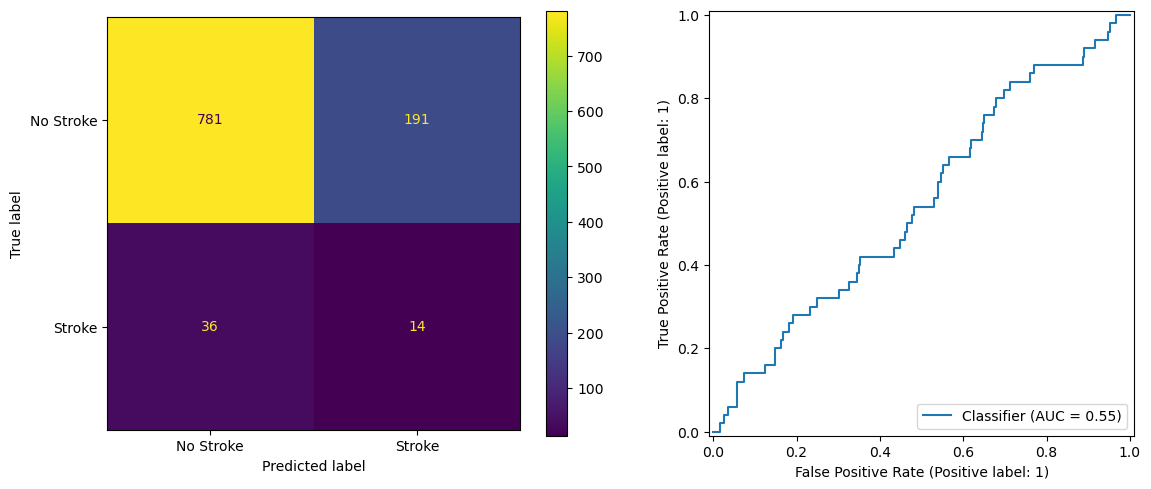


=== Bagging ===
--- Evaluation: Bagging ---
Balanced Accuracy: 0.6603
              precision    recall  f1-score   support

           0       0.99      0.38      0.55       972
           1       0.07      0.94      0.13        50

    accuracy                           0.41      1022
   macro avg       0.53      0.66      0.34      1022
weighted avg       0.95      0.41      0.53      1022



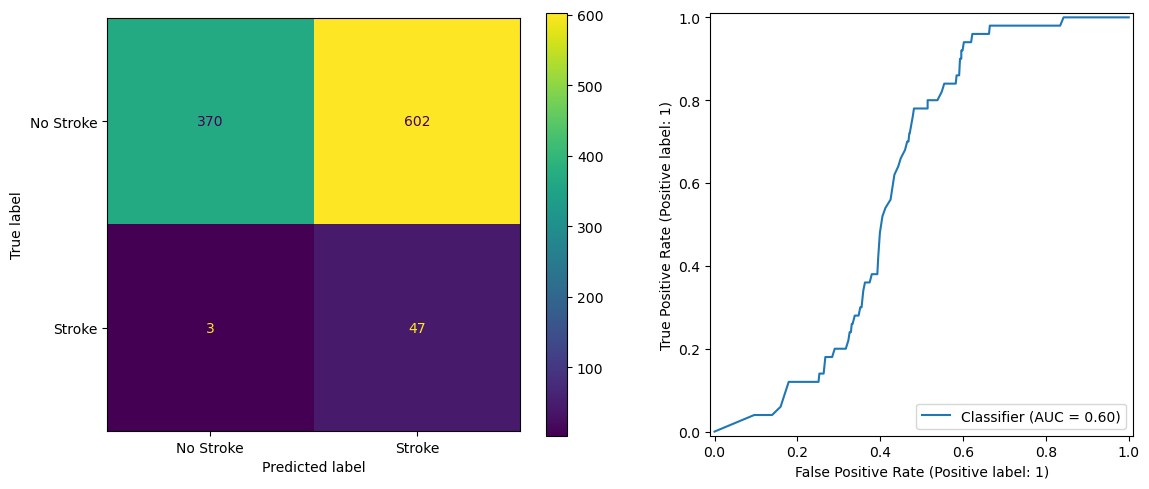


=== BalancedBagging ===
--- Evaluation: BalancedBagging ---
Balanced Accuracy: 0.6598
              precision    recall  f1-score   support

           0       0.99      0.38      0.55       972
           1       0.07      0.94      0.13        50

    accuracy                           0.41      1022
   macro avg       0.53      0.66      0.34      1022
weighted avg       0.95      0.41      0.53      1022



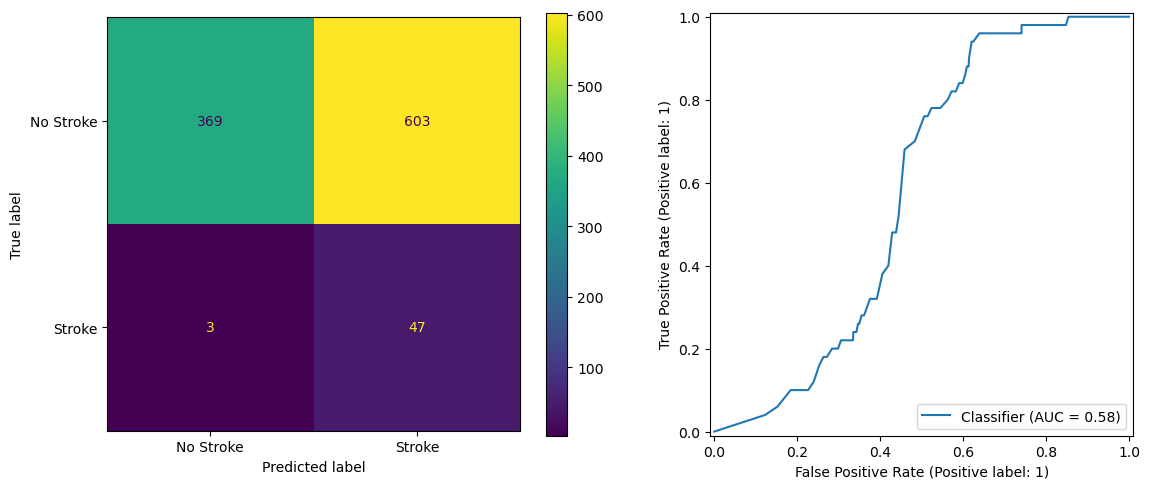


=== BalancedRandomForest ===
--- Evaluation: BalancedRandomForest ---
Balanced Accuracy: 0.5967
              precision    recall  f1-score   support

           0       1.00      0.19      0.32       972
           1       0.06      1.00      0.11        50

    accuracy                           0.23      1022
   macro avg       0.53      0.60      0.22      1022
weighted avg       0.95      0.23      0.31      1022



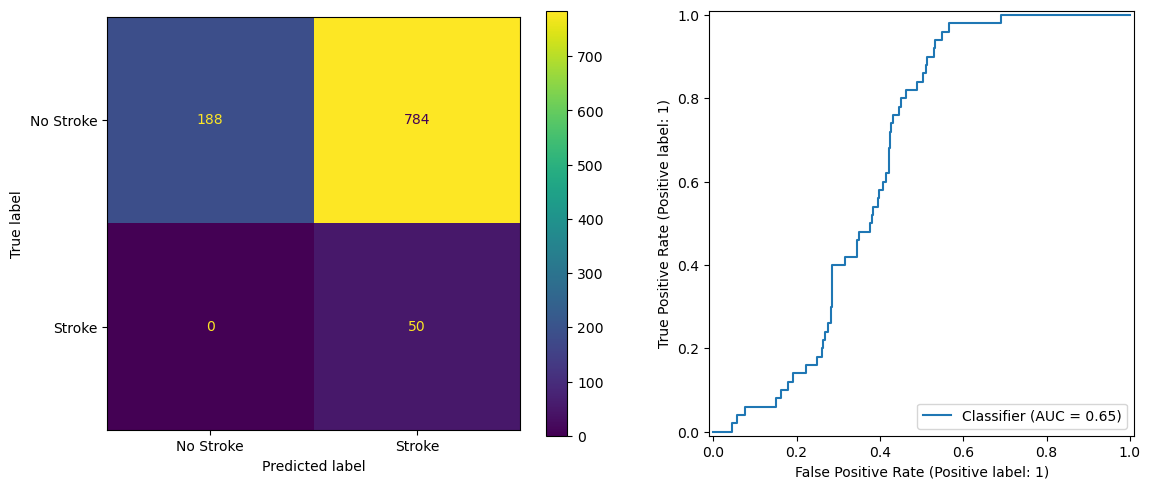


=== EasyEnsemble ===
--- Evaluation: EasyEnsemble ---
Balanced Accuracy: 0.5653
              precision    recall  f1-score   support

           0       1.00      0.13      0.23       972
           1       0.06      1.00      0.11        50

    accuracy                           0.17      1022
   macro avg       0.53      0.57      0.17      1022
weighted avg       0.95      0.17      0.22      1022



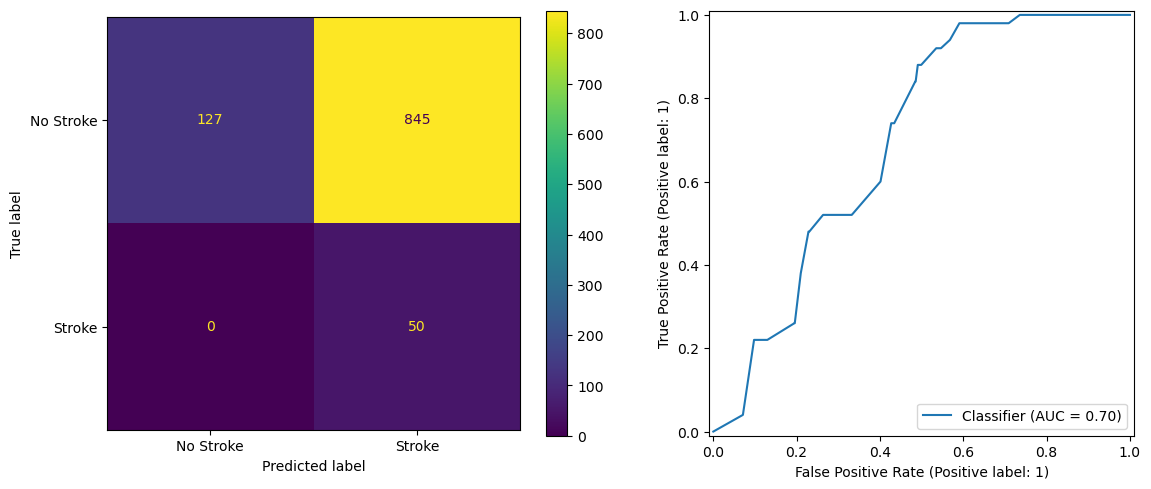


=== MLP ===
--- Evaluation: MLP ---
Balanced Accuracy: 0.6169
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       972
           1       0.10      0.42      0.17        50

    accuracy                           0.79      1022
   macro avg       0.53      0.62      0.52      1022
weighted avg       0.92      0.79      0.85      1022



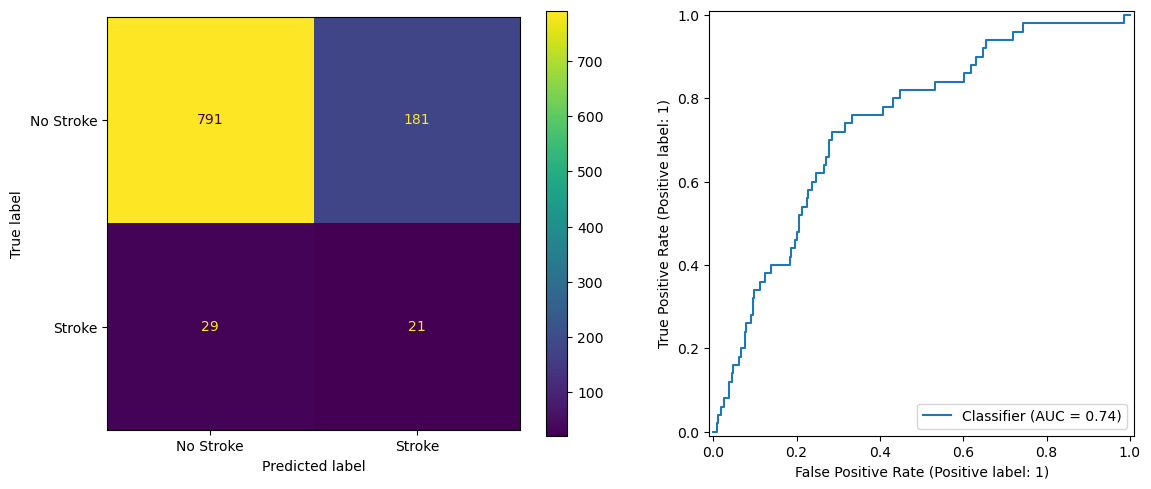

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
#from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
#from xgboost import XGBClassifier
#from sklearn.svm import SVC


best_estimators = {}
grid_models = [
    ('Naive Bayes', GaussianNB(), [{'var_smoothing': np.logspace(0, -9, num=10)}]),
    ('Logistic Regression', LogisticRegression(), [{'C':[0.25,0.5,0.75,1], 'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[1000]}]),
    ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
    ('KNN', KNeighborsClassifier(), [{'n_neighbors': list(range(1, 11)), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]),
    ('Decision Tree', DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 10)), 'max_features': [None, 'log2', 'sqrt'], 'random_state': [0]}]),
    ('Random Forest', RandomForestClassifier(), [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'random_state': [0]}]),
    ('Extra Trees', ExtraTreesClassifier(), [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'random_state': [0]}]),
    ('Gradient Boosting', GradientBoostingClassifier(), [{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.8, 1.0], 'max_features': ['sqrt', 'log2', None]}]),
    ('XGBoost', XGBClassifier(objective="binary:logistic", verbosity=0), [{'n_estimators': [50, 100], 'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01], 'subsample': [0.8, 1], 'colsample_bytree': [0.5, 0.8], 'scale_pos_weight': [estimate], 'random_state': [0]}]),
    ('SVM', SVC(probability=True), [{'C': [1, 10], 'gamma': ['scale', 0.1], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced'], 'random_state': [0]}]),
    ('Bagging', BaggingClassifier(), [{'n_estimators': [100, 200], 'random_state': [0]}]),
    ('BalancedBagging', BalancedBaggingClassifier(), [{'n_estimators': [100, 200], 'random_state': [0]}]),
    ('BalancedRandomForest', BalancedRandomForestClassifier(), [{'n_estimators': [200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': list(range(5, 10)), 'max_features': ['log2', 'sqrt'], 'random_state': [0]}]),
    ('EasyEnsemble', EasyEnsembleClassifier(), [{'n_estimators': [50, 100], 'random_state': [0]}]),
    ('MLP', MLPClassifier(), [{'hidden_layer_sizes': [(10,), (20,), (25,)], 'max_iter': [500], 'learning_rate': ['constant'], 'learning_rate_init': [0.003, 0.03, 0.3], 'momentum': [0.02, 0.2], 'activation': ['relu', 'tanh']}])
]

scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}
for name, estimator, param_grid in grid_models:
    # embed SMOTE + scaling + grid inside one pipeline
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('clf', GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            scoring=scoring,
            refit='roc_auc',
            cv=5,
            n_jobs=-1
        ))
    ])

    # fit on train
    pipeline.fit(X_train, y_train)

    # pull out the fitted GridSearchCV
    grid = pipeline.named_steps['clf']
    best_estimators[name] = grid.best_estimator_
    print(f"\n=== {name} ===")
    evaluate_model(
        clf=grid.best_estimator_,   # the best estimator from the grid search
        X_test=X_test,
        y_test=y_test,  
        name=name,
        results=ResultsSmote,   
        show_plots=True           # True if you want plots
    )   



In [ ]:


# Convert ResultsSmote to a DataFrame for easy sorting
results_smote_df = pd.DataFrame(ResultsSmote).T

# Sort by F1 or ROC AUC (choose your preferred metric)
top_n = 7  # Number of top models to select
top_models = results_smote_df.sort_values(by='Balanced Accuracy', ascending=False).head(top_n)
print("Top performing models (by Balanced Accuracy):")
print(top_models)

# Extract their names
selected_model_names = top_models.index.tolist()

# Get the actual estimator objects
selected_estimators = [(name, best_estimators[name]) for name in selected_model_names]

Top performing models (by Balanced Accuracy):
                     Balanced Accuracy  Precision  Recall        F1   ROC AUC
Logistic Regression           0.707263   0.090336    0.86  0.163498  0.839650
SGD                           0.698004   0.087045    0.86  0.158088       NaN
Bagging                       0.660329   0.072419    0.94  0.134478  0.595381
BalancedBagging               0.659815   0.072308    0.94  0.134286  0.576132
Naive Bayes                   0.659753   0.070912    0.98  0.132254  0.776317
XGBoost                       0.627058   0.064516    1.00  0.121212  0.589352
MLP                           0.616893   0.103960    0.42  0.166667  0.737613


--- Evaluation: StackingClassifier (SMOTE) ---
Balanced Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



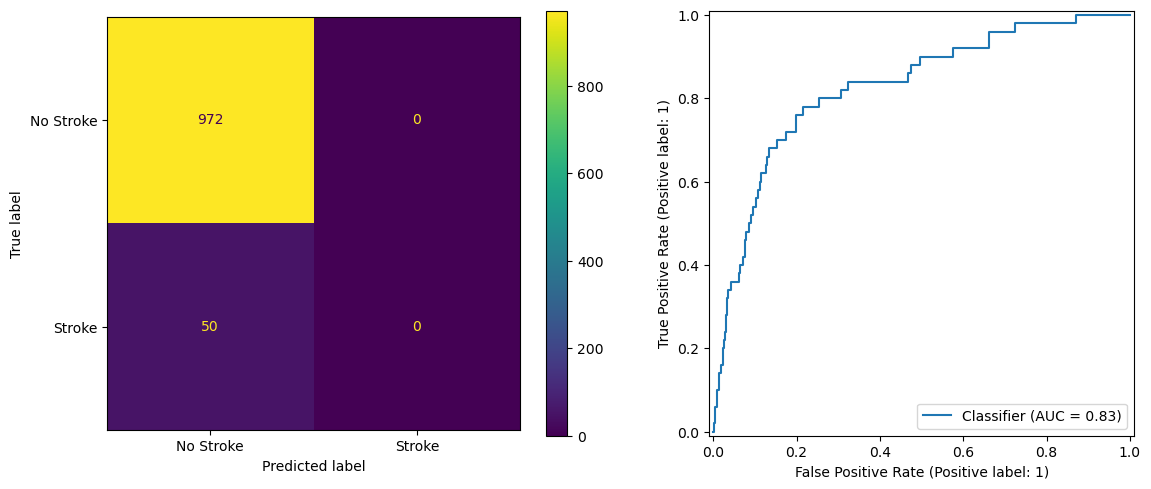

--- Evaluation: VotingClassifier (SMOTE) ---
Balanced Accuracy: 0.5374
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.44      0.08      0.14        50

    accuracy                           0.95      1022
   macro avg       0.70      0.54      0.55      1022
weighted avg       0.93      0.95      0.93      1022



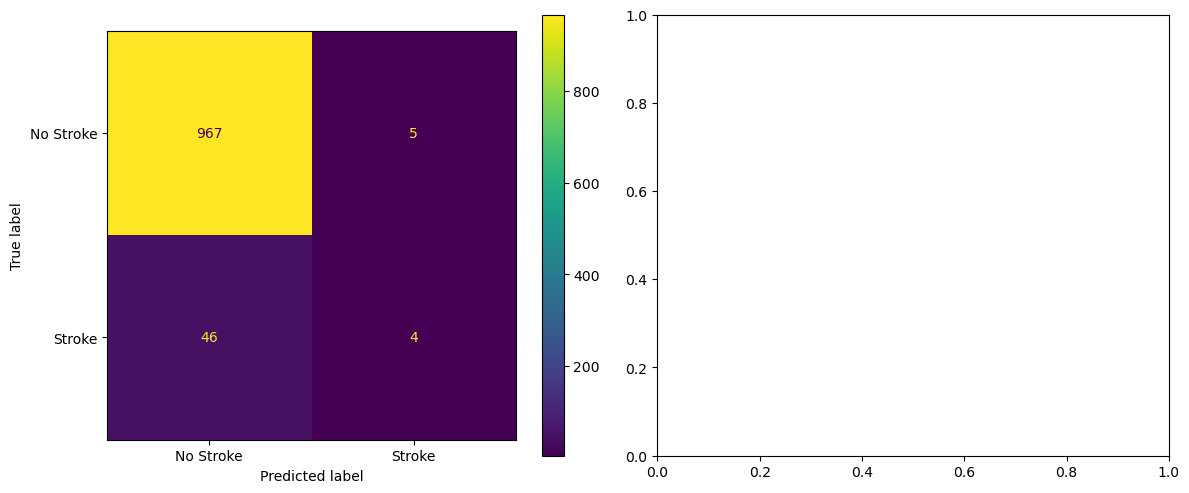

In [ ]:
# Now you can use selected_estimators for stacking or voting
from sklearn.ensemble import StackingClassifier, VotingClassifier

# Example: Stacking
stacking_clf = StackingClassifier(
    estimators=selected_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_clf.fit(X_train, y_train)
evaluate_model(
    clf=stacking_clf,
    X_test=X_test,
    y_test=y_test,
    name="StackingClassifier (SMOTE)",
    results=ResultsSmote,
    show_plots=True
)

voting_clf = VotingClassifier(
    estimators=selected_estimators,
    voting='hard'
)
voting_clf.fit(X_train, y_train)
evaluate_model(
    clf=voting_clf,
    X_test=X_test,
    y_test=y_test,
    name="VotingClassifier (SMOTE)",
    results=ResultsSmote,
    show_plots=True
)
voting_clf = VotingClassifier(
    estimators=selected_estimators,
    voting='soft',  # Use 'soft' voting for better probability estimates
)


### 6.3. Investigating Data Leakage: The Impact of Misapplying SMOTE

Data leakage is a common pitfall in machine learning, especially when using techniques like SMOTE. In this section, we will deliberately apply SMOTE to the entire dataset before the train-test split. While this is an incorrect practice, it serves to demonstrate how applying resampling techniques to data that will later be used for testing can lead to overly optimistic and misleading performance metrics. This experiment will highlight the importance of proper data handling procedures.

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
X_train_DL, X_test_DL, Y_train_DL, Y_test_DL = train_test_split(X,y,test_size=0.20,random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train_DL.shape)
print(X_test_DL.shape)
print(Y_train_DL.shape)
print(Y_test_DL.shape)

(7776, 17)
(1944, 17)
(7776,)
(1944,)


In [ ]:
ResultsSmoteDataLeakage={}


=== Naive Bayes ===
--- Evaluation: Naive Bayes ---
Balanced Accuracy: 0.6691
              precision    recall  f1-score   support

           0       0.96      0.35      0.52       970
           1       0.60      0.99      0.75       974

    accuracy                           0.67      1944
   macro avg       0.78      0.67      0.63      1944
weighted avg       0.78      0.67      0.63      1944



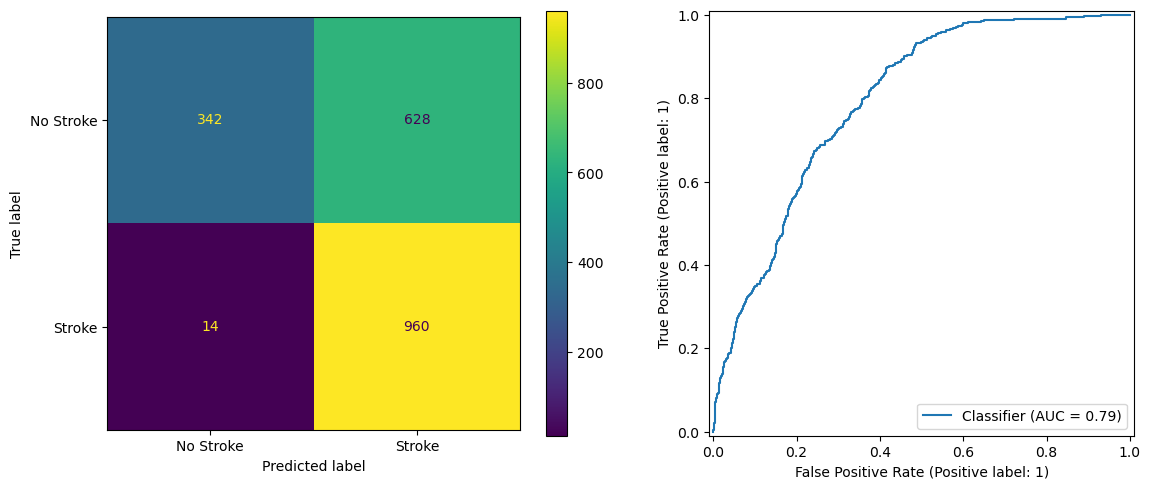


=== Logistic Regression ===
--- Evaluation: Logistic Regression ---
Balanced Accuracy: 0.7748
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       970
           1       0.70      0.96      0.81       974

    accuracy                           0.78      1944
   macro avg       0.82      0.77      0.77      1944
weighted avg       0.82      0.78      0.77      1944



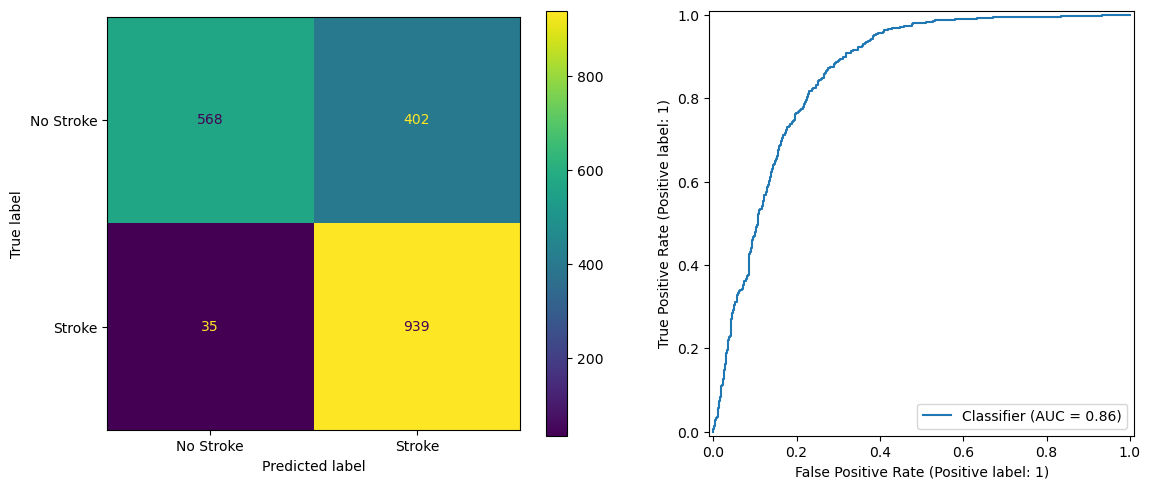


=== SGD ===
--- Evaluation: SGD ---
Balanced Accuracy: 0.7681
              precision    recall  f1-score   support

           0       0.93      0.58      0.71       970
           1       0.69      0.96      0.81       974

    accuracy                           0.77      1944
   macro avg       0.81      0.77      0.76      1944
weighted avg       0.81      0.77      0.76      1944



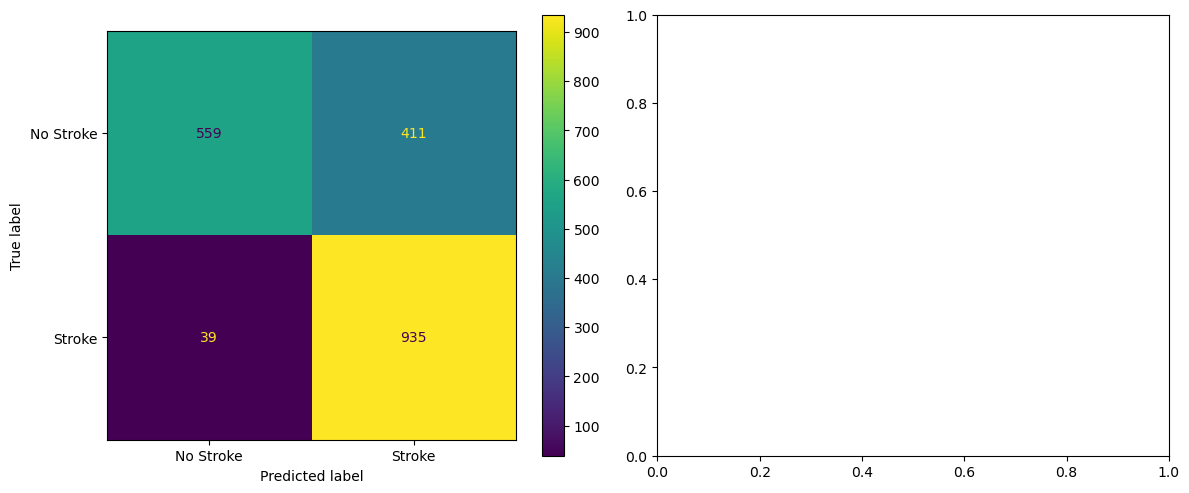


=== KNN ===
--- Evaluation: KNN ---
Balanced Accuracy: 0.8529
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       970
           1       0.84      0.87      0.86       974

    accuracy                           0.85      1944
   macro avg       0.85      0.85      0.85      1944
weighted avg       0.85      0.85      0.85      1944



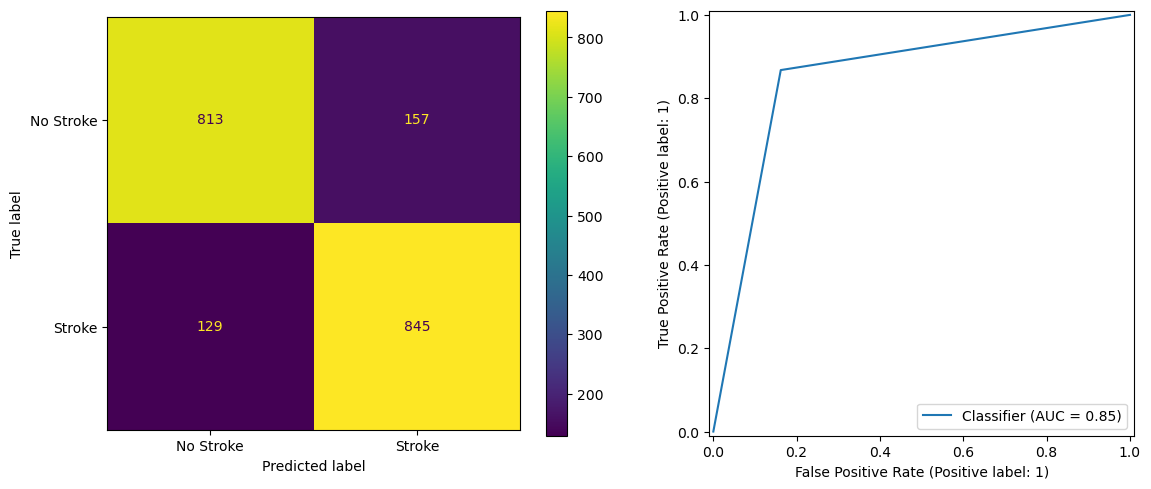


=== Decision Tree ===
--- Evaluation: Decision Tree ---
Balanced Accuracy: 0.4839
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       970
           1       0.49      0.55      0.51       974

    accuracy                           0.48      1944
   macro avg       0.48      0.48      0.48      1944
weighted avg       0.48      0.48      0.48      1944



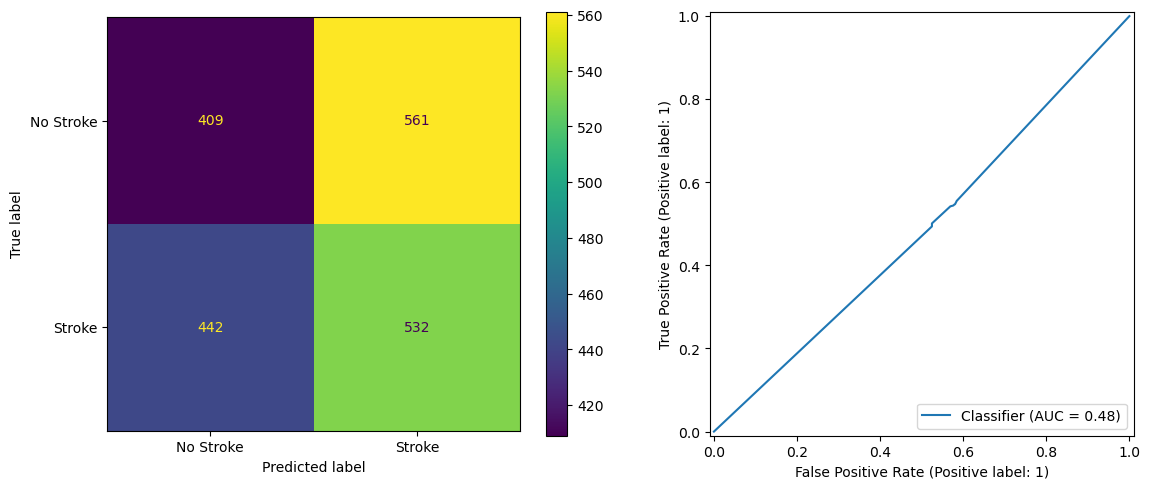


=== Random Forest ===
--- Evaluation: Random Forest ---
Balanced Accuracy: 0.5196
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       970
           1       0.51      1.00      0.68       974

    accuracy                           0.52      1944
   macro avg       0.76      0.52      0.38      1944
weighted avg       0.76      0.52      0.38      1944



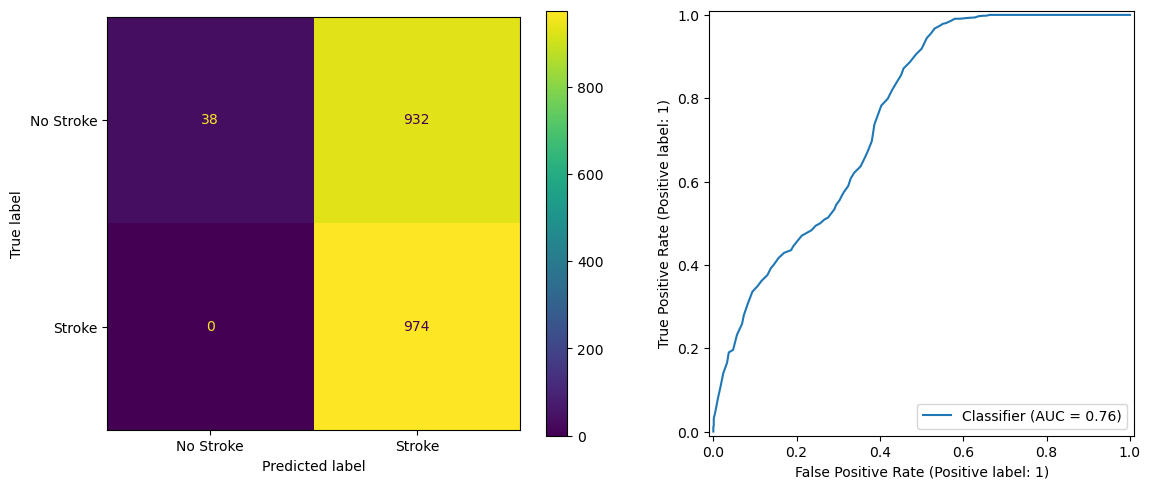


=== Extra Trees ===
--- Evaluation: Extra Trees ---
Balanced Accuracy: 0.7171
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       970
           1       0.64      0.97      0.78       974

    accuracy                           0.72      1944
   macro avg       0.80      0.72      0.70      1944
weighted avg       0.80      0.72      0.70      1944



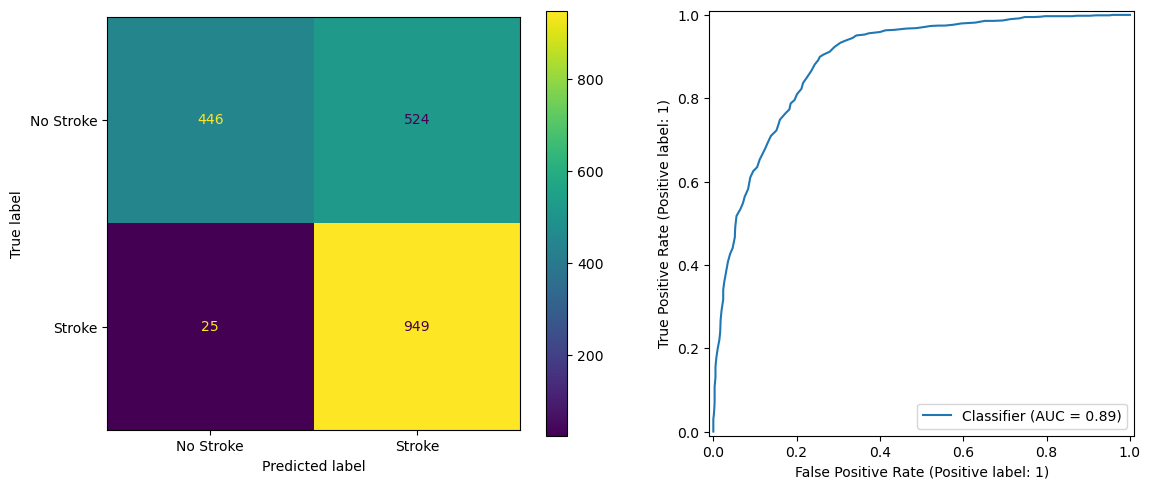


=== Gradient Boosting ===
--- Evaluation: Gradient Boosting ---
Balanced Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       970
           1       0.50      1.00      0.67       974

    accuracy                           0.50      1944
   macro avg       0.25      0.50      0.33      1944
weighted avg       0.25      0.50      0.33      1944



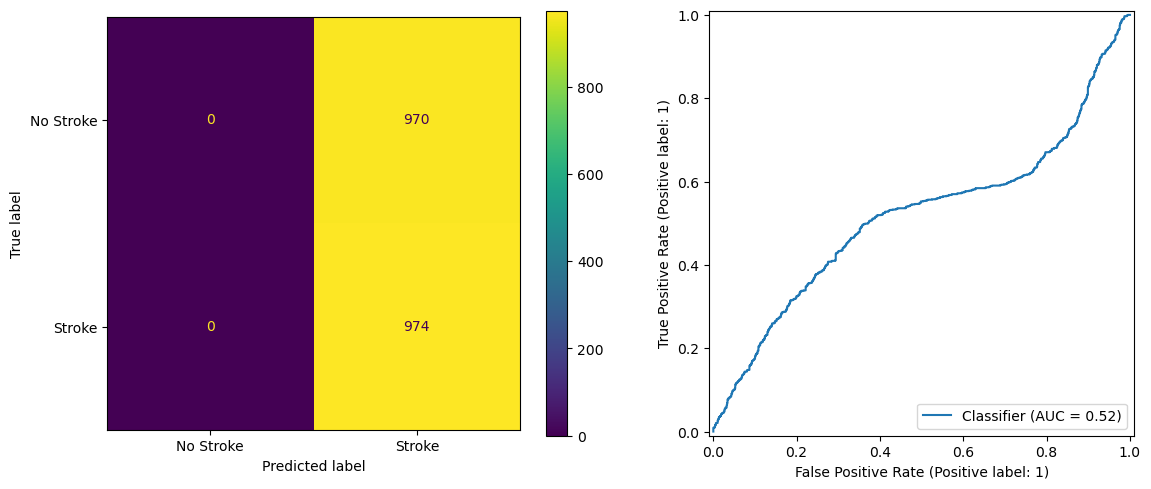


=== XGBoost ===
--- Evaluation: XGBoost ---
Balanced Accuracy: 0.6237
              precision    recall  f1-score   support

           0       1.00      0.25      0.40       970
           1       0.57      1.00      0.73       974

    accuracy                           0.62      1944
   macro avg       0.79      0.62      0.56      1944
weighted avg       0.79      0.62      0.56      1944



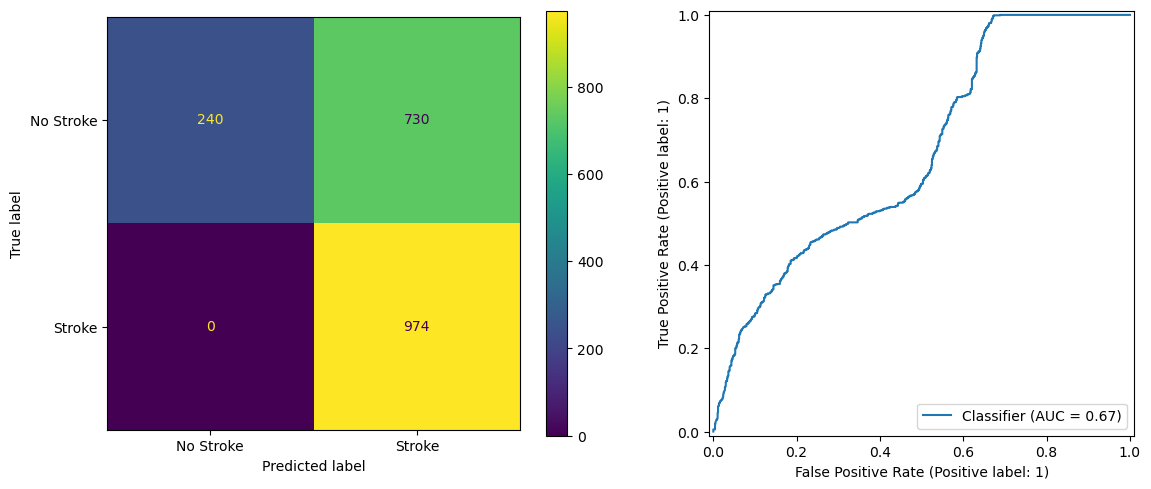


=== SVM ===
--- Evaluation: SVM ---
Balanced Accuracy: 0.7619
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       970
           1       0.78      0.73      0.76       974

    accuracy                           0.76      1944
   macro avg       0.76      0.76      0.76      1944
weighted avg       0.76      0.76      0.76      1944



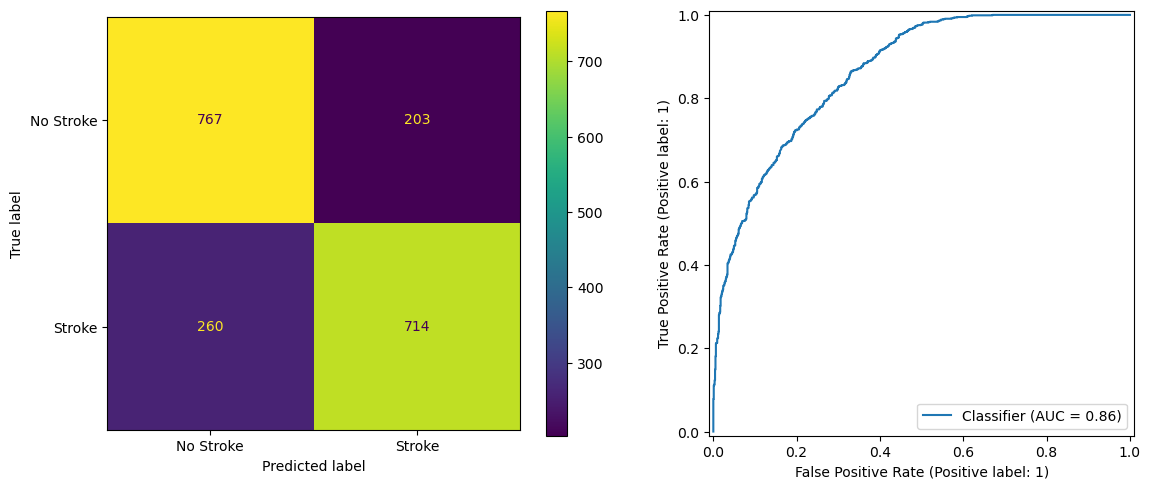


=== Bagging ===
--- Evaluation: Bagging ---
Balanced Accuracy: 0.5076
              precision    recall  f1-score   support

           0       0.51      0.45      0.48       970
           1       0.51      0.56      0.53       974

    accuracy                           0.51      1944
   macro avg       0.51      0.51      0.51      1944
weighted avg       0.51      0.51      0.51      1944



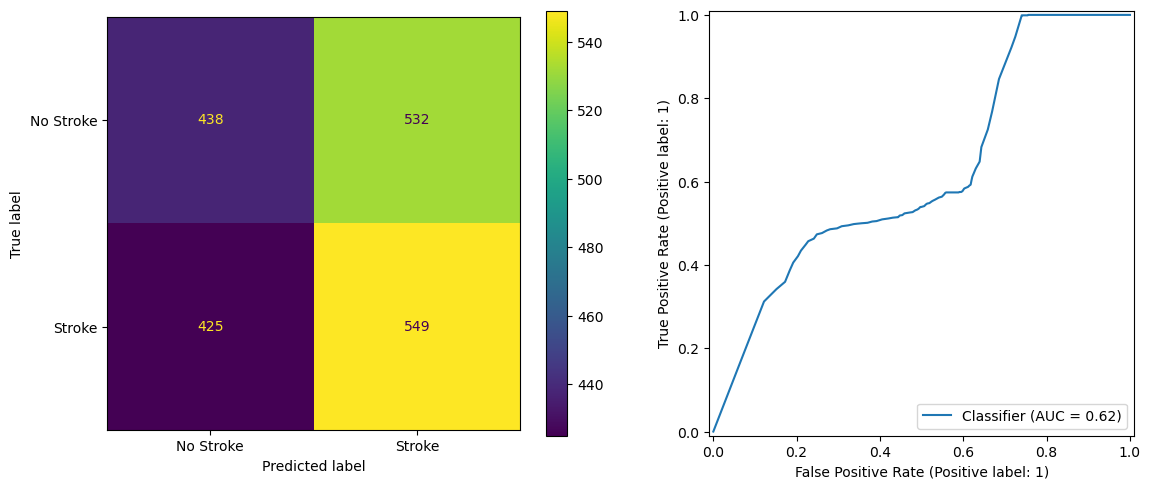


=== BalancedBagging ===
--- Evaluation: BalancedBagging ---
Balanced Accuracy: 0.5092
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       970
           1       0.51      0.56      0.53       974

    accuracy                           0.51      1944
   macro avg       0.51      0.51      0.51      1944
weighted avg       0.51      0.51      0.51      1944



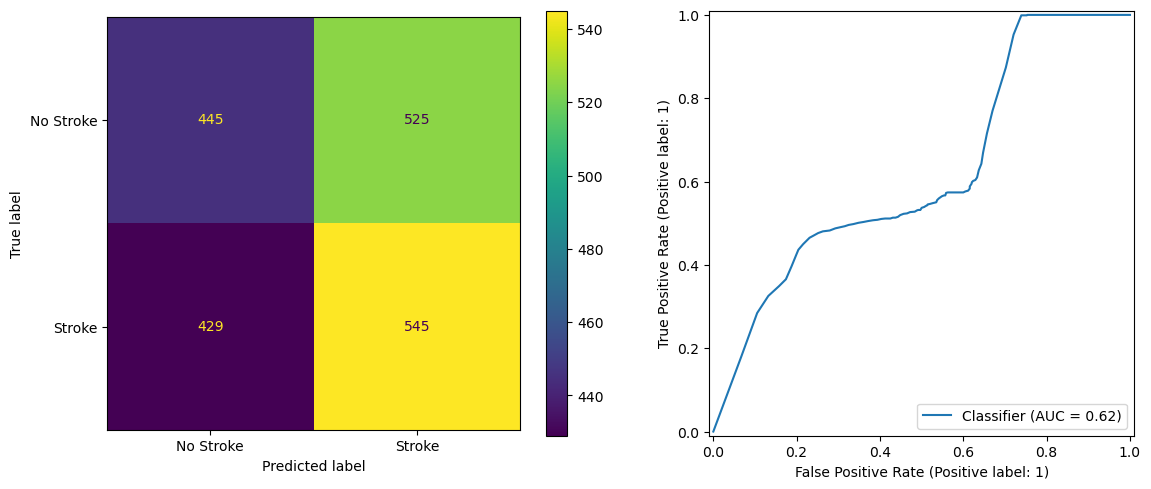


=== BalancedRandomForest ===
--- Evaluation: BalancedRandomForest ---
Balanced Accuracy: 0.5314
              precision    recall  f1-score   support

           0       1.00      0.06      0.12       970
           1       0.52      1.00      0.68       974

    accuracy                           0.53      1944
   macro avg       0.76      0.53      0.40      1944
weighted avg       0.76      0.53      0.40      1944



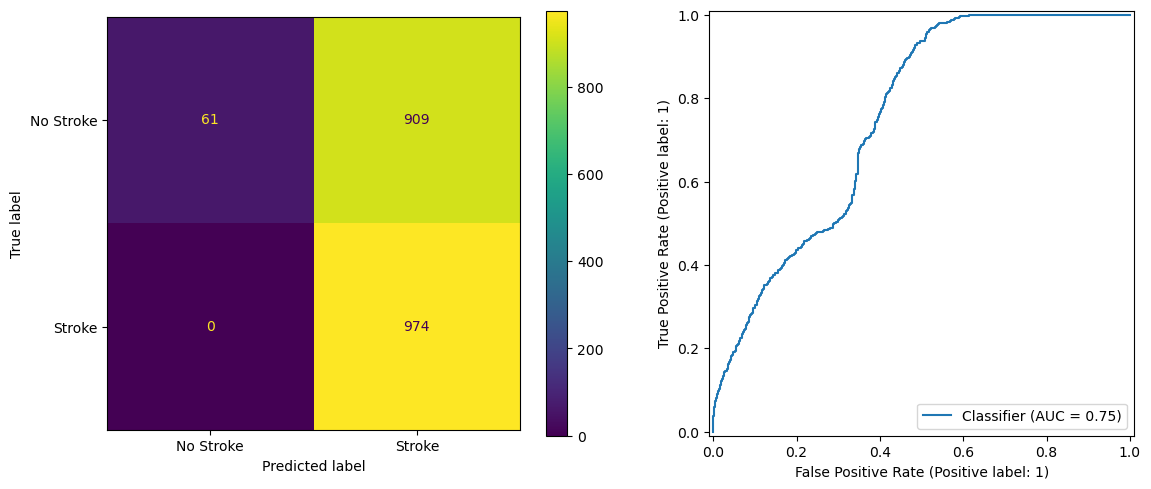


=== EasyEnsemble ===
--- Evaluation: EasyEnsemble ---
Balanced Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       970
           1       0.50      1.00      0.67       974

    accuracy                           0.50      1944
   macro avg       0.25      0.50      0.33      1944
weighted avg       0.25      0.50      0.33      1944



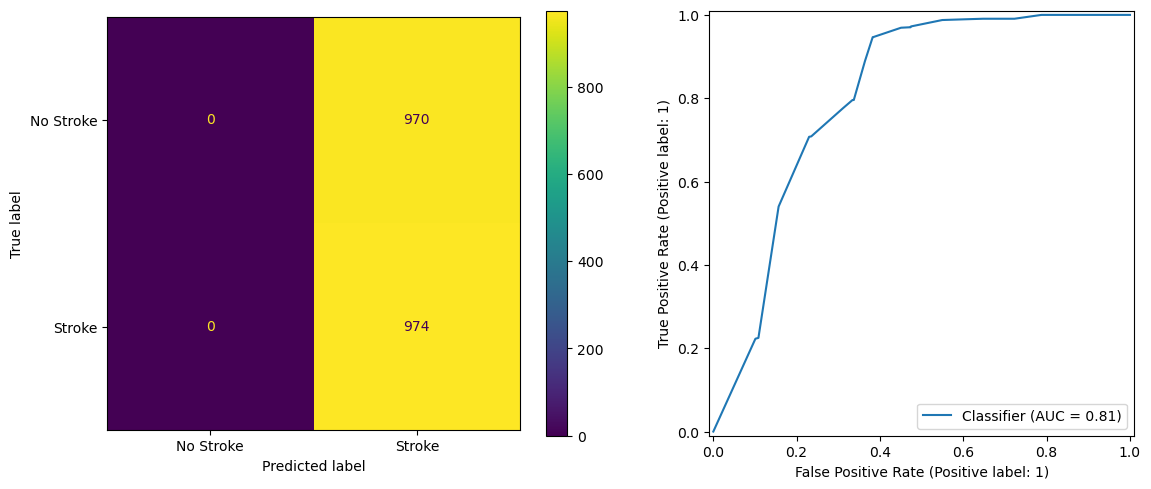


=== MLP ===
--- Evaluation: MLP ---
Balanced Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       970
           1       0.76      0.91      0.83       974

    accuracy                           0.81      1944
   macro avg       0.83      0.81      0.81      1944
weighted avg       0.82      0.81      0.81      1944



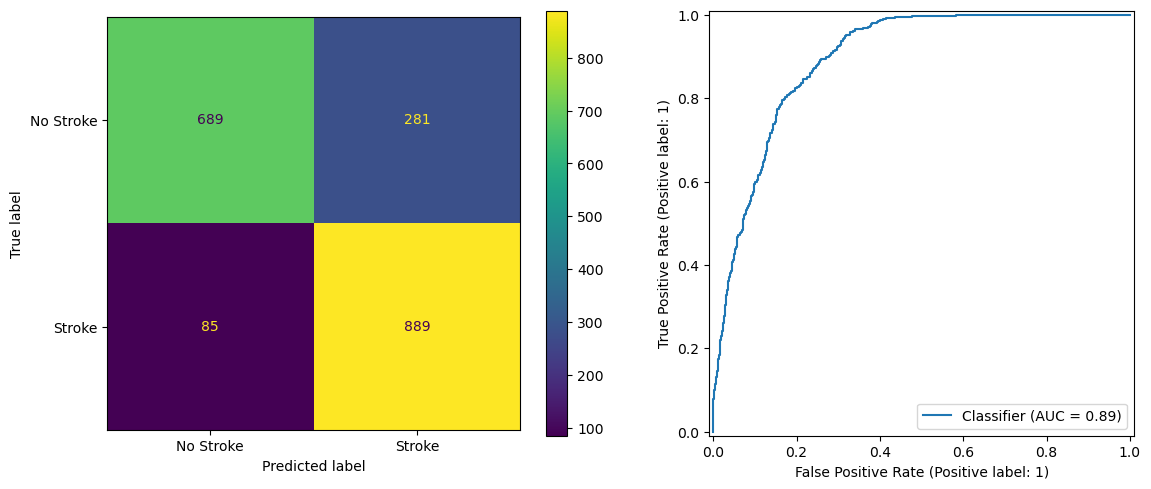

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
#from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
#from xgboost import XGBClassifier
#from sklearn.svm import SVC


best_estimators = {}
grid_models = [
    ('Naive Bayes', GaussianNB(), [{'var_smoothing': np.logspace(0, -9, num=10)}]),
    ('Logistic Regression', LogisticRegression(), [{'C':[0.25,0.5,0.75,1], 'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[1000]}]),
    ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
    ('KNN', KNeighborsClassifier(), [{'n_neighbors': list(range(1, 11)), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]),
    ('Decision Tree', DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 10)), 'max_features': [None, 'log2', 'sqrt'], 'random_state': [0]}]),
    ('Random Forest', RandomForestClassifier(), [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'random_state': [0]}]),
    ('Extra Trees', ExtraTreesClassifier(), [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'random_state': [0]}]),
    ('Gradient Boosting', GradientBoostingClassifier(), [{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.8, 1.0], 'max_features': ['sqrt', 'log2', None]}]),
    ('XGBoost', XGBClassifier(objective="binary:logistic", verbosity=0), [{'n_estimators': [50, 100], 'max_depth': [3, 5, 10], 'learning_rate': [0.1, 0.01], 'subsample': [0.8, 1], 'colsample_bytree': [0.5, 0.8], 'scale_pos_weight': [estimate], 'random_state': [0]}]),
    ('SVM', SVC(probability=True), [{'C': [1, 10], 'gamma': ['scale', 0.1], 'kernel': ['linear', 'rbf'], 'class_weight': ['balanced'], 'random_state': [0]}]),
    ('Bagging', BaggingClassifier(), [{'n_estimators': [100, 200], 'random_state': [0]}]),
    ('BalancedBagging', BalancedBaggingClassifier(), [{'n_estimators': [100, 200], 'random_state': [0]}]),
    ('BalancedRandomForest', BalancedRandomForestClassifier(), [{'n_estimators': [200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': list(range(5, 10)), 'max_features': ['log2', 'sqrt'], 'random_state': [0]}]),
    ('EasyEnsemble', EasyEnsembleClassifier(), [{'n_estimators': [50, 100], 'random_state': [0]}]),
    ('MLP', MLPClassifier(), [{'hidden_layer_sizes': [(10,), (20,), (25,)], 'max_iter': [500], 'learning_rate': ['constant'], 'learning_rate_init': [0.003, 0.03, 0.3], 'momentum': [0.02, 0.2], 'activation': ['relu', 'tanh']}])
]

scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}
for name, estimator, param_grid in grid_models:
    # embed SMOTE + scaling + grid inside one pipeline
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('clf', GridSearchCV(
            estimator=estimator,
            param_grid=param_grid,
            scoring=scoring,
            refit='roc_auc',
            cv=5,
            n_jobs=-1
        ))
    ])

    # fit on train
    pipeline.fit(X_train_DL, Y_train_DL)

    # pull out the fitted GridSearchCV
    grid = pipeline.named_steps['clf']
    best_estimators[name] = grid.best_estimator_
    print(f"\n=== {name} ===")
    evaluate_model(
        clf=grid.best_estimator_,   # the best estimator from the grid search
        X_test=X_test_DL,
        y_test=Y_test_DL,  
        name=name,
        results=ResultsSmoteDataLeakage,   
        show_plots=True             # True if you want plots
    )   



In [ ]:
# Convert ResultsSmote to a DataFrame for easy sorting
results_smote_df = pd.DataFrame(ResultsSmoteDataLeakage).T

# Sort by F1 or ROC AUC (choose your preferred metric)
top_n = 7  # Number of top models to select
top_models = results_smote_df.sort_values(by='Balanced Accuracy', ascending=False).head(top_n)
print("Top performing models (by Balanced Accuracy):")
print(top_models)

# Extract their names
selected_model_names = top_models.index.tolist()

# Get the actual estimator objects
selected_estimators = [(name, best_estimators[name]) for name in selected_model_names]

Top performing models (by Balanced Accuracy):
                     Balanced Accuracy  Precision    Recall        F1  \
KNN                           0.852850   0.843313  0.867556  0.855263   
MLP                           0.811520   0.759829  0.912731  0.829291   
Logistic Regression           0.774816   0.700224  0.964066  0.811231   
SGD                           0.768124   0.694651  0.959959  0.806034   
SVM                           0.761891   0.778626  0.733060  0.755156   
Extra Trees                   0.717063   0.644263  0.974333  0.775644   
Naive Bayes                   0.669102   0.604534  0.985626  0.749415   

                      ROC AUC  
KNN                  0.852850  
MLP                  0.894989  
Logistic Regression  0.859497  
SGD                       NaN  
SVM                  0.864710  
Extra Trees          0.890142  
Naive Bayes          0.793355  


--- Evaluation: StackingClassifier (SMOTE) ---
Balanced Accuracy: 0.9650
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       970
           1       0.96      0.98      0.97       974

    accuracy                           0.97      1944
   macro avg       0.97      0.96      0.97      1944
weighted avg       0.97      0.97      0.97      1944



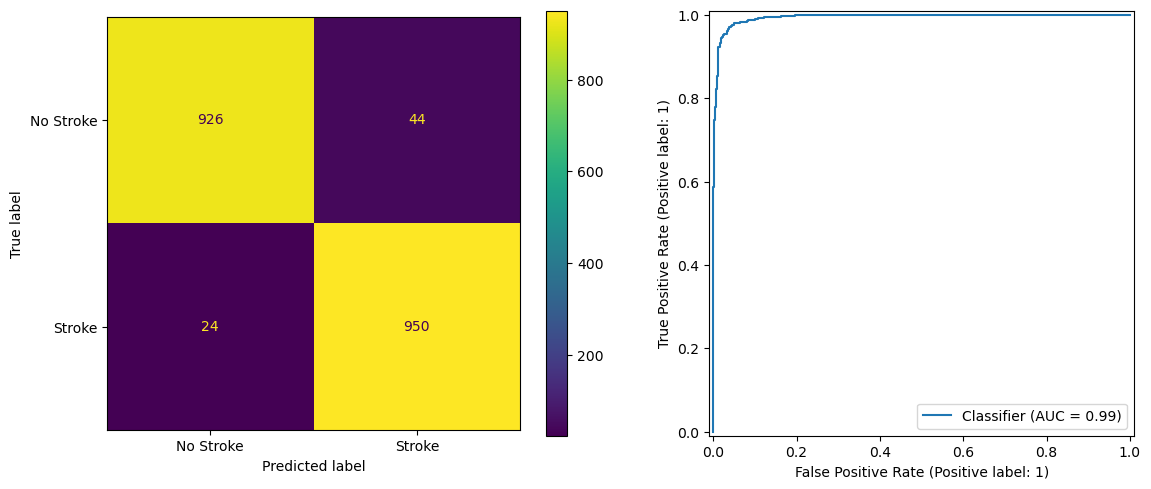

--- Evaluation: VotingClassifier (SMOTE) ---
Balanced Accuracy: 0.9134
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.87      0.98      0.92       974

    accuracy                           0.91      1944
   macro avg       0.92      0.91      0.91      1944
weighted avg       0.92      0.91      0.91      1944



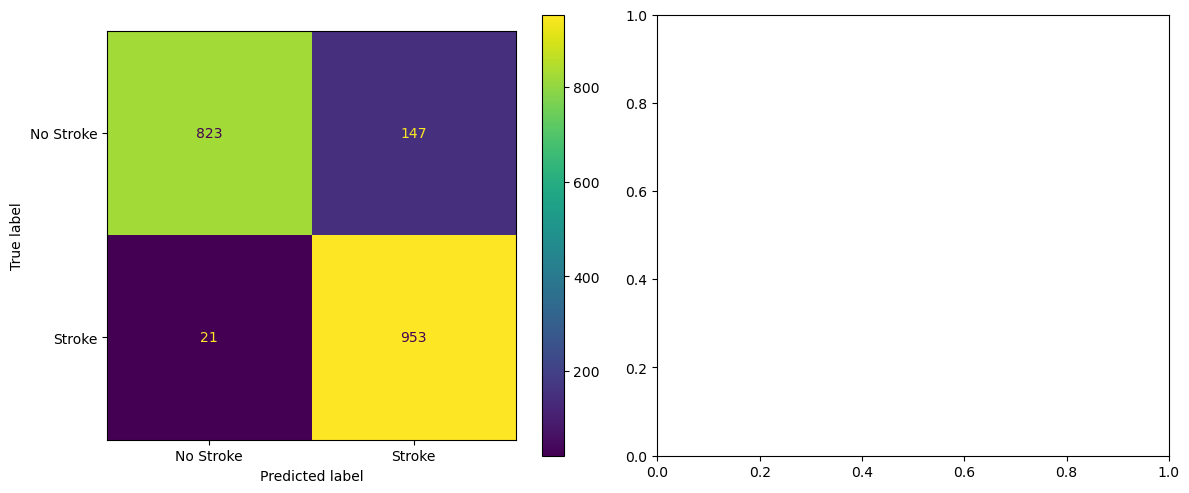

In [ ]:
# Now you can use selected_estimators for stacking or voting
from sklearn.ensemble import StackingClassifier, VotingClassifier

# Example: Stacking
stacking_clf = StackingClassifier(
    estimators=selected_estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
stacking_clf.fit(X_train_DL, Y_train_DL)
evaluate_model(
    clf=stacking_clf,
    X_test=X_test_DL,
    y_test=Y_test_DL,
    name="StackingClassifier (SMOTE)",
    results=ResultsSmoteDataLeakage,
    show_plots=True
)

voting_clf = VotingClassifier(
    estimators=selected_estimators,
    voting='hard'
)
voting_clf.fit(X_train_DL, Y_train_DL)
evaluate_model(
    clf=voting_clf,
    X_test=X_test_DL,
    y_test=Y_test_DL,
    name="VotingClassifier (SMOTE)",
    results=ResultsSmoteDataLeakage,
    show_plots=True
)
voting_clf = VotingClassifier(
    estimators=selected_estimators,
    voting='soft',  # Use 'soft' voting for better probability estimates
)


## 7. Neural Network

Finally, we will explore the application of a neural network for the stroke prediction task. We will design, train, and evaluate a neural network, paying attention to its architecture, activation functions, and optimization, and compare its performance against the traditional machine learning models. ( SMOTE will be used for the training data for the NN).

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [ ]:

model=keras.Sequential([
    keras.layers.Dense(4800,input_shape=[17], activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4800)           │        86,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     9,602,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,691,401 (48.41 MB)

 Trainable params: 12,691,401 (48.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
train = model.fit(X_smote, y_smote, epochs=100,batch_size=100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7423 - loss: 0.4926
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.8384 - loss: 0.3560
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.8754 - loss: 0.2862
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.8956 - loss: 0.2496
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9160 - loss: 0.2164
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.9273 - loss: 0.1795
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9362 - loss: 0.1718
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9412 - loss: 0.1604
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.9501 - loss: 0.1413
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.9510 - loss: 0.1423
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.9523 - loss: 0.1293
Epoch 12/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step

In [ ]:
model.evaluate(X_smote, y_smote)

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9842 - loss: 0.0376


[0.03505368530750275, 0.9872685074806213]

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.15      0.18      0.16        50

    accuracy                           0.91      1022
   macro avg       0.55      0.56      0.56      1022
weighted avg       0.92      0.91      0.91      1022



<Axes: >

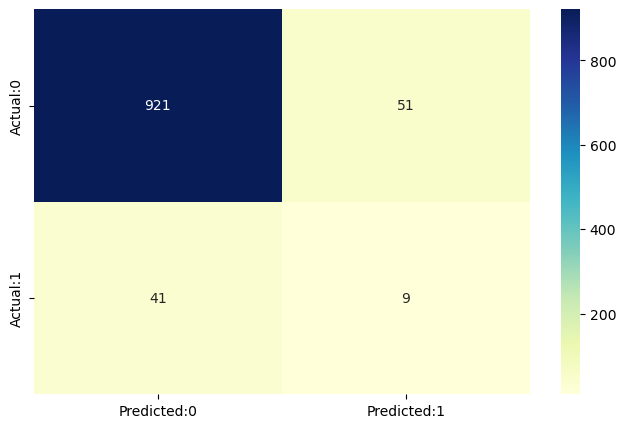

In [ ]:
cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Adding Dropout layer
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [ ]:

model = Sequential()
# Replace 'input_sh__DLdd' with the correct input_shape, e.g., input_shape=(17,)
model.add(Dense(512, activation='relu', input_shape=(17,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 518,529 (1.98 MB)

 Trainable params: 518,529 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [ ]:
model.fit(X_smote, y_smote,epochs=50, batch_size=100, validation_split=0.30,callbacks=cb)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6761 - loss: 0.6440 - val_accuracy: 0.0000e+00 - val_loss: 0.9913
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7129 - loss: 0.5172 - val_accuracy: 0.3142 - val_loss: 0.8939
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7355 - loss: 0.4405 - val_accuracy: 0.7184 - val_loss: 0.7500
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7790 - loss: 0.4104 - val_accuracy: 0.7595 - val_loss: 0.7055
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7974 - loss: 0.3848 - val_accuracy: 0.7853 - val_loss: 0.6542
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8101 - loss: 0.3731 - val_accuracy: 0.8397 - val_loss: 0.5664
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8169 - loss: 0.3651 - val_accuracy: 0.7557 - val_loss: 0.6599
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8191 - loss: 0.3586 - val_accuracy: 0.8474 - val_

In [ ]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.4516 


[0.465641051530838, 0.873776912689209]

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.12      0.24      0.16        50

    accuracy                           0.87      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.92      0.87      0.89      1022



<Axes: >

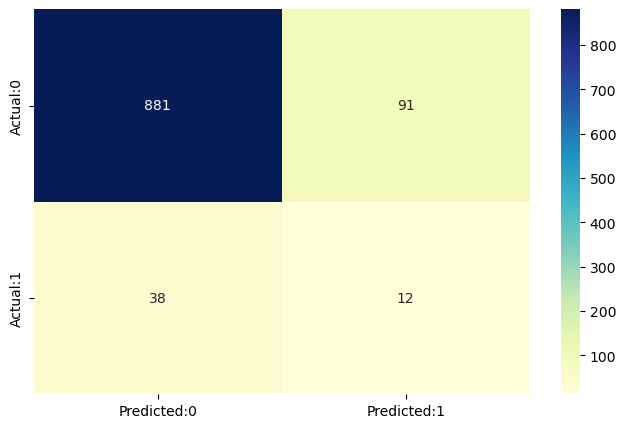

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## 8. Comparison & Discussion

Finally, we will compile the results from all models into a single DataFrame and visualize them to easily compare their performance.

In [ ]:
import pandas as pd # Just in case they are already DataFrames or have DataFrame-like structure

print("--- Content of 'results' ---")
print(results)

print("\n--- Content of 'ResultsSmote' ---")
print(ResultsSmote)

print("\n--- Content of 'ResultsSmoteDataLeakage' ---")
print(ResultsSmoteDataLeakage)

# Optional: If you suspect they might be pandas DataFrames already,
# you can also print their index (model names) and dtypes (column types)
print("\n--- Index of 'results_df' (if already a DataFrame) ---")
try:
    results_df = pd.DataFrame(results).T # Attempt to convert to DataFrame if not already
    print(results_df.index.tolist())
    print(results_df.dtypes)
except Exception as e:
    print(f"Could not convert 'results' to DataFrame or access index: {e}")

print("\n--- Index of 'ResultsSmote_df' (if already a DataFrame) ---")
try:
    results_smote_df = pd.DataFrame(ResultsSmote).T
    print(results_smote_df.index.tolist())
    print(results_smote_df.dtypes)
except Exception as e:
    print(f"Could not convert 'ResultsSmote' to DataFrame or access index: {e}")

print("\n--- Index of 'ResultsSmoteDataLeakage_df' (if already a DataFrame) ---")
try:
    results_smote_dl_df = pd.DataFrame(ResultsSmoteDataLeakage).T
    print(results_smote_dl_df.index.tolist())
    print(results_smote_dl_df.dtypes)
except Exception as e:
    print(f"Could not convert 'ResultsSmoteDataLeakage' to DataFrame or access index: {e}")

--- Content of 'results' ---
{'LogisticRegression': {'Balanced Accuracy': 0.51, 'Precision': 1.0, 'Recall': 0.02, 'F1': 0.0392156862745098, 'ROC AUC': 0.8390946502057613}, 'K-Nearest Neighbors': {'Balanced Accuracy': 0.5335390946502058, 'Precision': 0.13513513513513514, 'Recall': 0.1, 'F1': 0.11494252873563218, 'ROC AUC': 0.5335390946502059}, 'DecisionTree': {'Balanced Accuracy': 0.7583127572016461, 'Precision': 0.13220338983050847, 'Recall': 0.78, 'F1': 0.22608695652173913, 'ROC AUC': 0.7985905349794238}, 'DecisionTree-GridSearch': {'Balanced Accuracy': 0.6967489711934156, 'Precision': 0.08823529411764706, 'Recall': 0.84, 'F1': 0.1596958174904943, 'ROC AUC': 0.8203806584362141}, 'GaussianNB-GridSearch': {'Balanced Accuracy': 0.7059053497942387, 'Precision': 0.10393258426966293, 'Recall': 0.74, 'F1': 0.18226600985221675, 'ROC AUC': 0.7945061728395062}, 'BaggingClassifier': {'Balanced Accuracy': 0.4963991769547325, 'Precision': 0.0, 'Recall': 0.0, 'F1': 0.0, 'ROC AUC': 0.688456790123456


Common Models AFTER Standardization: ['Bagging', 'BalancedBagging', 'BalancedRandomForest', 'Decision Tree', 'EasyEnsemble', 'Extra Trees', 'Gradient Boosting', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'VotingClassifier (SMOTE)', 'XGBoost']


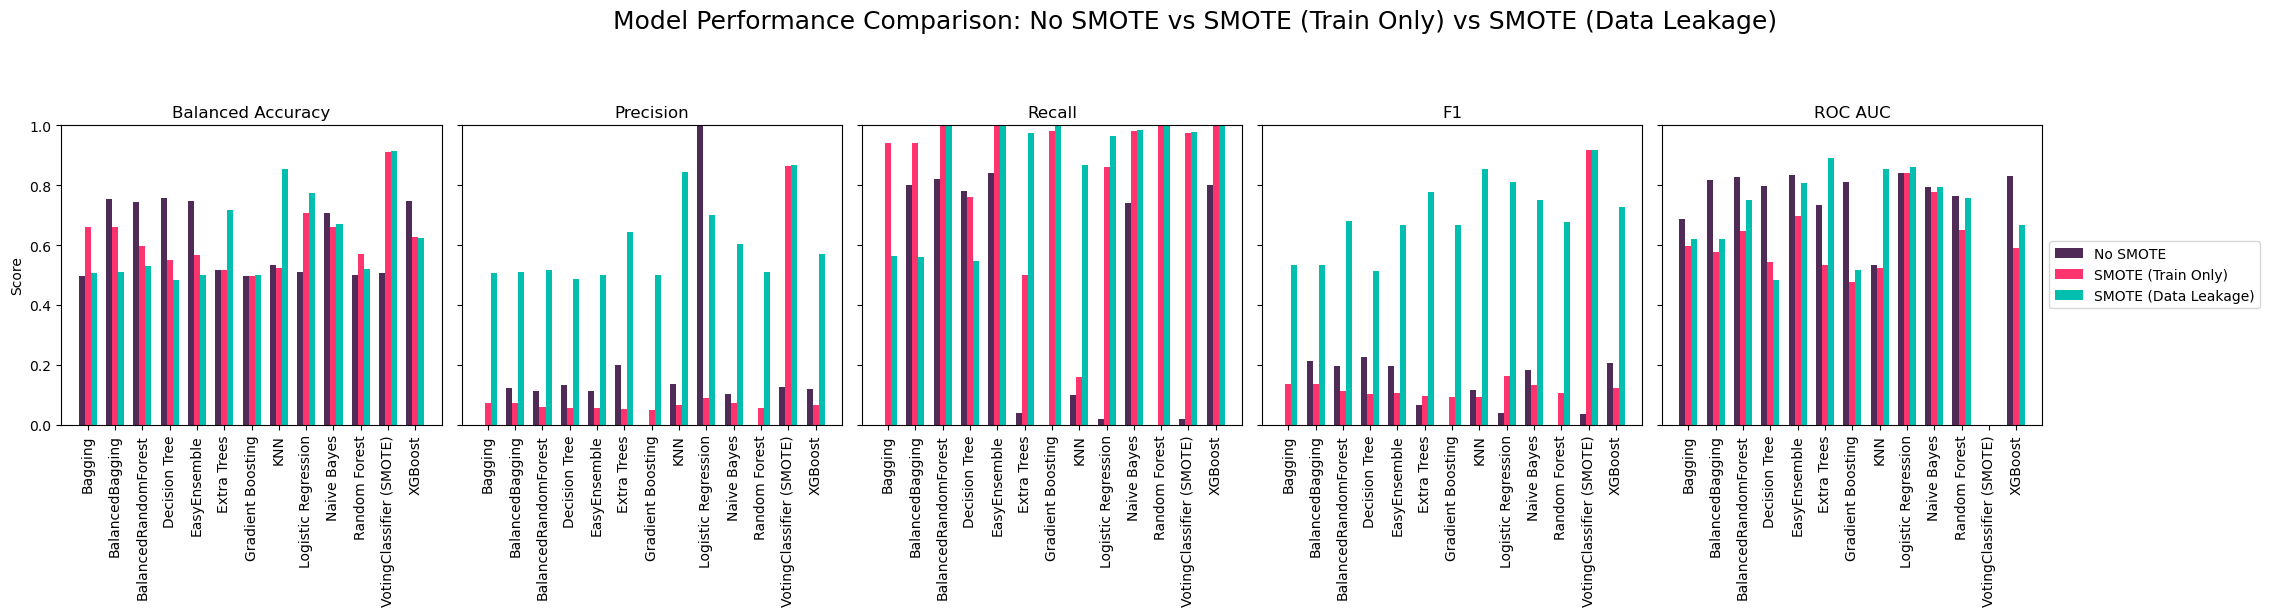


--- DataFrames after Standardization and Filtering ---

results_df final (common models):
                           Balanced Accuracy  Precision  Recall        F1  \
Bagging                            0.496399   0.000000    0.00  0.000000   
BalancedBagging                    0.752366   0.122324    0.80  0.212202   
BalancedRandomForest               0.742305   0.111717    0.82  0.196643   
Decision Tree                      0.758313   0.132203    0.78  0.226087   
EasyEnsemble                       0.747160   0.111111    0.84  0.196262   
Extra Trees                        0.515885   0.200000    0.04  0.066667   
Gradient Boosting                  0.497942   0.000000    0.00  0.000000   
KNN                                0.533539   0.135135    0.10  0.114943   
Logistic Regression                0.510000   1.000000    0.02  0.039216   
Naive Bayes                        0.705905   0.103933    0.74  0.182266   
Random Forest                      0.499486   0.000000    0.00  0.000000

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Define a mapping for inconsistent model names to a standardized name
name_mapping = {
    # Standardize 'No SMOTE' names to match 'SMOTE (Train Only)' and 'SMOTE (Data Leakage)'
    'LogisticRegression': 'Logistic Regression',
    'K-Nearest Neighbors': 'KNN',
    'DecisionTree': 'Decision Tree',
    'DecisionTree-GridSearch': 'Decision Tree (GridSearch)', # Keep GridSearch variants separate for clarity, or map to 'Decision Tree' if you only want one
    'GaussianNB-GridSearch': 'Naive Bayes', # Map specific Naive Bayes to generic 'Naive Bayes'
    'BaggingClassifier': 'Bagging',
    'BalancedBaggingClassifier-GridSearch': 'BalancedBagging',
    'RandomForest': 'Random Forest',
    'ExtraTrees': 'Extra Trees',
    'BalancedRandomForest-GridSearch': 'BalancedRandomForest',
    'GradientBoosting': 'Gradient Boosting',
    'GradientBoosting-GridSearch': 'Gradient Boosting (GridSearch)', # Keep GridSearch variants separate for clarity
    'XGBoost-GridSearch': 'XGBoost',
    'EasyEnsemble-GridSearch': 'EasyEnsemble',
    'Hard Voting Classifier': 'VotingClassifier (SMOTE)', # Map this to the common SMOTE voting name
    # 'SGD', 'SVM', 'MLP', 'StackingClassifier (SMOTE)', 'VotingClassifier (SMOTE)' already seem consistent or specific
}

# Function to apply the 
# mapping to a dictionary's keys
def standardize_keys(data_dict, mapping):
    standardized_data = {}
    for key, value in data_dict.items():
        standardized_key = mapping.get(key, key) # Use mapped name, or original if no mapping
        standardized_data[standardized_key] = value
    return standardized_data

# Apply standardization to all result dictionaries
results_standardized = standardize_keys(results, name_mapping)
results_smote_standardized = standardize_keys(ResultsSmote, name_mapping)
results_smote_dl_standardized = standardize_keys(ResultsSmoteDataLeakage, name_mapping)


# Convert results to DataFrames
results_df = pd.DataFrame(results_standardized).T
results_smote_df = pd.DataFrame(results_smote_standardized).T
results_smote_dl_df = pd.DataFrame(results_smote_dl_standardized).T

# Find common models across all approaches
common_models = sorted(
    set(results_df.index) & set(results_smote_df.index) & set(results_smote_dl_df.index)
)

print(f"\nCommon Models AFTER Standardization: {common_models}")
if not common_models:
    print("Warning: No common models found even after standardization. Check your name_mapping or data sources.")

# Filter DataFrames to common models and align order
results_df = results_df.loc[common_models]
results_smote_df = results_smote_df.loc[common_models]
results_smote_dl_df = results_smote_dl_df.loc[common_models]

# Metrics to plot
metrics = ['Balanced Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']

fig, axes = plt.subplots(1, len(metrics), figsize=(24, 6), sharey=True)
approaches = ['No SMOTE', 'SMOTE (Train Only)', 'SMOTE (Data Leakage)']
colors = ['#512b58', '#fe346e', '#00bfae']

for i, metric in enumerate(metrics):
    ax = axes[i]
    width = 0.22
    x = np.arange(len(common_models))

    # Plot bars for each approach, handling potential NaN values gracefully
    # Matplotlib's bar function usually skips NaN values.
    # We explicitly select the series to ensure alignment.
    ax.bar(x - width, results_df[metric], width, label=approaches[0], color=colors[0])
    ax.bar(x, results_smote_df[metric], width, label=approaches[1], color=colors[1])
    ax.bar(x + width, results_smote_dl_df[metric], width, label=approaches[2], color=colors[2])

    ax.set_xticks(x)
    ax.set_xticklabels(common_models, rotation=90)
    ax.set_title(metric)
    if i == 0:
        ax.set_ylabel('Score')
    if i == len(metrics) - 1:
        # Place legend outside the plot area on the right for better readability
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylim(0, 1) # Set Y-limit from 0 to 1 as scores are typically between these values

plt.suptitle('Model Performance Comparison: No SMOTE vs SMOTE (Train Only) vs SMOTE (Data Leakage)', fontsize=18, y=1.05)
plt.tight_layout(rect=[0, 0.03, 0.95, 0.98]) # Adjust layout to make space for suptitle and legend
plt.show()

# Final check of the dataframes after filtering and standardization
print("\n--- DataFrames after Standardization and Filtering ---")
print("\nresults_df final (common models):\n", results_df[metrics])
print("\nresults_smote_df final (common models):\n", results_smote_df[metrics])
print("\nresults_smote_dl_df final (common models):\n", results_smote_dl_df[metrics])

## 9. Conclusion

In this section, you will write your final report based on the results.

*   **Summary of Work:** Briefly restate the project's objective and the steps you took (EDA, preprocessing with SMOTE, model training).
*   **Best Model:** Identify which model performed the best. Justify your choice by referring to the evaluation metrics (e.g., "The Random Forest model was chosen as the best-performing model due to its highest F1-Score of [value] and ROC-AUC score of [value], indicating a strong balance between precision and recall.").
*   **Insights:** Discuss the results. Did the ensemble models (Random Forest, Gradient Boosting) perform better than the basic models (Logistic Regression, KNN)? Why do you think that is? (Hint: Ensembles combine multiple models to reduce errors and improve generalization).
*   **Limitations & Future Work:** Mention any limitations (e.g., the dataset size is still relatively small) and suggest what could be done next (e.g., collecting more data, trying more advanced models like XGBoost, or performing hyperparameter tuning to optimize the best model).